In [57]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import verde as vd
import harmonica as hm
import boule as bl
import ensaio
import pygmt
import pyproj

# import utm
import geopandas as gpd

import pathlib
import os

import warnings
warnings.filterwarnings("ignore")

# Load gravity data table

In [58]:
data_dir = pathlib.Path("..") / "data"
image_dir = pathlib.Path("..") / "report" / "figures"
shape_dir = pathlib.Path("..") / "data" / "shapefile"

mpl_rc = {"text.usetex": True, "font.family": "serif", "font.size": 9}

Read shapefile

In [59]:
pluton = os.path.join(shape_dir/"corrego_seco.shp")

Read regional data

In [60]:
data = pd.read_csv(data_dir/'regional_data.csv', delimiter=';')
# data = data.iloc[::5]  # Seleciona a cada 4 linhas

In [61]:
data.head(5)

Station  Longitude   Latitude  Elevation        Gravity
0        2 -50.172917 -16.597917      594.0  978288.210050
1        3 -50.168750 -16.597917      595.0  978287.413200
2        4 -50.164583 -16.597917      603.0  978284.467233
3        5 -50.160417 -16.597917      616.0  978279.995975
4        6 -50.156250 -16.597917      626.0  978276.475002

In [62]:
region = (-50.172916666667, -49.806250000000, -16.597916666667, -16.222916666667)
region_pad = vd.pad_region(region, pad=0.00)
print(region_pad)

(-50.172916666667, -49.80625, -16.597916666667, -16.222916666667)


In [63]:
# topography_copy = pygmt.datasets.load_earth_relief(resolution="15s", region=region_pad)
topography = pygmt.datasets.load_earth_relief(resolution="01m", region=region_pad)
topography = topography.rename({'lon': 'longitude', 'lat': 'latitude'})
topography

<xarray.DataArray 'z' (latitude: 24, longitude: 24)> Size: 5kB
array([[597.5, 622. , 649. , 639. , 623. , 631. , 645. , 670.5, 671. ,
        679.5, 702.5, 713. , 702.5, 683.5, 687. , 703. , 680. , 660.5,
        635. , 624.5, 649. , 667. , 702.5, 717.5],
       [601.5, 631.5, 663.5, 659. , 646.5, 645. , 648. , 686. , 696.5,
        701. , 711. , 725.5, 716. , 709.5, 722. , 707.5, 676. , 653. ,
        632.5, 628.5, 665.5, 674.5, 697. , 693.5],
       [600. , 603.5, 632. , 637. , 643. , 646. , 654. , 664. , 673. ,
        701.5, 716.5, 747. , 741.5, 718. , 720. , 705.5, 687. , 662.5,
        633.5, 635. , 660.5, 678.5, 714. , 706. ],
       [623.5, 607. , 607. , 630. , 628.5, 637. , 654.5, 681. , 682.5,
        692.5, 714. , 762.5, 742. , 706.5, 686.5, 684. , 682. , 660.5,
        641. , 658. , 664. , 675. , 719. , 699. ],
       [648. , 618. , 611. , 651.5, 652. , 650.5, 673. , 728.5, 719. ,
        721. , 747. , 773. , 753.5, 747.5, 708. , 676.5, 657. , 639. ,
        661.5, 682.5, 698.5, 702. , 710.5, 699. ],
       [648. , 613. , 612.5, 636.5, 649. , 658.5, 683.5, 717. , 716.5,
        731.5, 750.5, 778.5, 770. , 741. , 705.5, 684.5, 664. , 646. ,
        664. , 703. , 732. , 740. , 726. , 707. ],
       [644.5, 613.5, 617. , 630. , 628.5, 645. , 663. , 727.5, 737. ,
        742.5, 762. , 789.5, 769. , 727. , 725. , 682.5, 661.5, 661. ,
...
        883. , 871.5, 831.5, 818. , 856.5, 825.5, 813.5, 792.5, 770.5,
        757. , 791.5, 820.5, 836. , 859. , 860.5],
       [758. , 729. , 695. , 689. , 689. , 703. , 712.5, 781.5, 821.5,
        883. , 865.5, 831. , 830.5, 868. , 859. , 854. , 800.5, 773.5,
        758.5, 784.5, 806. , 834.5, 880. , 892.5],
       [770. , 757. , 718.5, 730. , 710.5, 694.5, 714.5, 813. , 852. ,
        886. , 871. , 853.5, 849.5, 856. , 866.5, 855. , 818.5, 800. ,
        771. , 775. , 790. , 801. , 846.5, 867. ],
       [758. , 754.5, 733. , 736. , 721. , 708. , 730. , 831. , 873.5,
        901.5, 892. , 868. , 875. , 868.5, 861.5, 862.5, 883. , 836. ,
        783.5, 786. , 820.5, 829.5, 868.5, 856.5],
       [775.5, 777. , 773. , 746. , 720.5, 721.5, 737.5, 798. , 843.5,
        913.5, 906.5, 889. , 889.5, 896. , 879. , 893.5, 912. , 874. ,
        842.5, 836. , 848. , 848.5, 867.5, 836.5],
       [802. , 790. , 823.5, 818.5, 778.5, 749.5, 748.5, 787. , 841. ,
        907.5, 890.5, 875. , 874.5, 899.5, 913.5, 932. , 930.5, 908.5,
        882.5, 856.5, 817.5, 807.5, 840. , 837.5],
       [788. , 759. , 783. , 827. , 813. , 807. , 805.5, 815.5, 838.5,
        848.5, 841.5, 837.5, 850. , 886. , 903.5, 913. , 935. , 889. ,
        821.5, 809.5, 779. , 785.5, 823. , 832. ]])
Coordinates:
  * latitude   (latitude) float64 192B -16.6 -16.58 -16.57 ... -16.23 -16.22
  * longitude  (longitude) float64 192B -50.18 -50.17 -50.15 ... -49.82 -49.8
Attributes:
    Conventions:       CF-1.7
    title:             
    history:           gmt grdblend @earth_relief_01m_g/ -R-50.18333333333333...
    description:       IGPP Earth relief
    long_name:         z
    units:             meters
    vertical_datum:    EGM96
    horizontal_datum:  WGS84

In [64]:
topography = topography.sel(longitude=slice(*region_pad[:2]), latitude=slice(*region_pad[2:]))
# km_per_degree = 111  
# wavelength_deg = 3 / km_per_degree  
# topography = hm.filters.gaussian_lowpass_kernel(topography, wavelength_deg)*1000
topography

<xarray.DataArray 'z' (latitude: 22, longitude: 22)> Size: 4kB
array([[631.5, 663.5, 659. , 646.5, 645. , 648. , 686. , 696.5, 701. ,
        711. , 725.5, 716. , 709.5, 722. , 707.5, 676. , 653. , 632.5,
        628.5, 665.5, 674.5, 697. ],
       [603.5, 632. , 637. , 643. , 646. , 654. , 664. , 673. , 701.5,
        716.5, 747. , 741.5, 718. , 720. , 705.5, 687. , 662.5, 633.5,
        635. , 660.5, 678.5, 714. ],
       [607. , 607. , 630. , 628.5, 637. , 654.5, 681. , 682.5, 692.5,
        714. , 762.5, 742. , 706.5, 686.5, 684. , 682. , 660.5, 641. ,
        658. , 664. , 675. , 719. ],
       [618. , 611. , 651.5, 652. , 650.5, 673. , 728.5, 719. , 721. ,
        747. , 773. , 753.5, 747.5, 708. , 676.5, 657. , 639. , 661.5,
        682.5, 698.5, 702. , 710.5],
       [613. , 612.5, 636.5, 649. , 658.5, 683.5, 717. , 716.5, 731.5,
        750.5, 778.5, 770. , 741. , 705.5, 684.5, 664. , 646. , 664. ,
        703. , 732. , 740. , 726. ],
       [613.5, 617. , 630. , 628.5, 645. , 663. , 727.5, 737. , 742.5,
        762. , 789.5, 769. , 727. , 725. , 682.5, 661.5, 661. , 661. ,
        681. , 688.5, 702. , 723. ],
       [636. , 673. , 673.5, 648.5, 664. , 686. , 768. , 774. , 769.5,
        783. , 779. , 778.5, 732. , 702. , 675.5, 693. , 706. , 678. ,
...
        868. , 834.5, 809. , 839. , 832.5, 795. , 772.5, 767.5, 755.5,
        780. , 796.5, 790.5, 806.5],
       [718.5, 690. , 680. , 707.5, 725. , 730.5, 789.5, 842. , 883. ,
        871.5, 831.5, 818. , 856.5, 825.5, 813.5, 792.5, 770.5, 757. ,
        791.5, 820.5, 836. , 859. ],
       [729. , 695. , 689. , 689. , 703. , 712.5, 781.5, 821.5, 883. ,
        865.5, 831. , 830.5, 868. , 859. , 854. , 800.5, 773.5, 758.5,
        784.5, 806. , 834.5, 880. ],
       [757. , 718.5, 730. , 710.5, 694.5, 714.5, 813. , 852. , 886. ,
        871. , 853.5, 849.5, 856. , 866.5, 855. , 818.5, 800. , 771. ,
        775. , 790. , 801. , 846.5],
       [754.5, 733. , 736. , 721. , 708. , 730. , 831. , 873.5, 901.5,
        892. , 868. , 875. , 868.5, 861.5, 862.5, 883. , 836. , 783.5,
        786. , 820.5, 829.5, 868.5],
       [777. , 773. , 746. , 720.5, 721.5, 737.5, 798. , 843.5, 913.5,
        906.5, 889. , 889.5, 896. , 879. , 893.5, 912. , 874. , 842.5,
        836. , 848. , 848.5, 867.5],
       [790. , 823.5, 818.5, 778.5, 749.5, 748.5, 787. , 841. , 907.5,
        890.5, 875. , 874.5, 899.5, 913.5, 932. , 930.5, 908.5, 882.5,
        856.5, 817.5, 807.5, 840. ]])
Coordinates:
  * latitude   (latitude) float64 176B -16.58 -16.57 -16.55 ... -16.25 -16.23
  * longitude  (longitude) float64 176B -50.17 -50.15 -50.13 ... -49.83 -49.82
Attributes:
    Conventions:       CF-1.7
    title:             
    history:           gmt grdblend @earth_relief_01m_g/ -R-50.18333333333333...
    description:       IGPP Earth relief
    long_name:         z
    units:             meters
    vertical_datum:    EGM96
    horizontal_datum:  WGS84

In [65]:
topography_table = vd.grid_to_table(topography)
# topography_table.to_csv('topography_grid.grd', index=False, sep=' ')

In [66]:
# geoid = pygmt.datasets.load_earth_geoid(resolution="01m", region=region_pad, registration="gridline")
geoid = pygmt.datasets.load_earth_geoid(resolution="01m", 
                                        region=np.array(vd.get_region(
                                            (topography.coords['longitude'], 
                                             topography.coords['latitude'])
                                        )),
                                        registration="gridline")

geoid = geoid.rename({'lon': 'longitude', 'lat': 'latitude'})

geoid = geoid.sel(longitude=slice(*region_pad[:2]), latitude=slice(*region_pad[2:]))
interpolator = vd.KNeighbors()

geoid_table = vd.grid_to_table(geoid)
geoid_1 = vd.grid_to_table(topography)

interpolator.fit((geoid_table.longitude, geoid_table.latitude), geoid_table.z)
geoid_1 = geoid_1.assign(elevation=interpolator.predict((geoid_1.longitude, geoid_1.latitude)))

geoid_values = np.reshape(geoid_1.elevation, topography.shape)
geoid = xr.DataArray(geoid_values, coords=[topography.latitude, topography.longitude], dims=['latitude', 'longitude'])
geoid

<xarray.DataArray (latitude: 22, longitude: 22)> Size: 4kB
array([[-6.85999966, -6.92999983, -6.98999977, -7.05999994, -7.11999989,
        -7.19000006, -7.25999975, -7.31999969, -7.39999962, -7.48000002,
        -7.55999994, -7.63999987, -7.73000002, -7.81999969, -7.90999985,
        -8.        , -8.07999992, -8.15999985, -8.22999954, -8.30999947,
        -8.36999989, -8.43999958],
       [-6.85999966, -6.92000008, -6.98000002, -7.04999971, -7.10999966,
        -7.17999983, -7.23999977, -7.30999994, -7.37999964, -7.46000004,
        -7.53999996, -7.61999989, -7.71000004, -7.79999971, -7.88999987,
        -7.96999979, -8.05999947, -8.13999939, -8.21000004, -8.27999973,
        -8.34999943, -8.40999985],
       [-6.8499999 , -6.90999985, -6.98000002, -7.03999996, -7.0999999 ,
        -7.17000008, -7.23000002, -7.29999971, -7.36999989, -7.44000006,
        -7.51999998, -7.5999999 , -7.69000006, -7.77999973, -7.85999966,
        -7.94999981, -8.02999973, -8.10999966, -8.18999958, -8.26000023,
        -8.31999969, -8.38999939],
       [-6.83999968, -6.89999962, -6.96999979, -7.02999973, -7.08999968,
        -7.15999985, -7.21999979, -7.27999973, -7.3499999 , -7.4199996 ,
        -7.5       , -7.57999992, -7.6699996 , -7.75999975, -7.83999968,
        -7.92999983, -8.01000023, -8.09000015, -8.15999985, -8.22999954,
        -8.28999996, -8.35999966],
...
       [-6.79999971, -6.8499999 , -6.89999962, -6.96000004, -7.00999975,
        -7.04999971, -7.0999999 , -7.14999962, -7.19999981, -7.25      ,
        -7.29999971, -7.35999966, -7.4199996 , -7.48999977, -7.55999994,
        -7.61999989, -7.69000006, -7.75999975, -7.81999969, -7.87999964,
        -7.94000006, -8.        ],
       [-6.80999994, -6.85999966, -6.90999985, -6.96000004, -7.00999975,
        -7.05999994, -7.10999966, -7.14999962, -7.19999981, -7.25      ,
        -7.30999994, -7.35999966, -7.42999983, -7.48999977, -7.55999994,
        -7.62999964, -7.69000006, -7.75999975, -7.81999969, -7.87999964,
        -7.94000006, -8.        ],
       [-6.81999969, -6.86999989, -6.92000008, -6.96999979, -7.01999998,
        -7.06999969, -7.11999989, -7.15999985, -7.21000004, -7.25999975,
        -7.30999994, -7.36999989, -7.42999983, -7.5       , -7.55999994,
        -7.62999964, -7.69999981, -7.75999975, -7.82999992, -7.88999987,
        -7.94999981, -8.01000023],
       [-6.83999968, -6.88999987, -6.94000006, -6.98999977, -7.03999996,
        -7.08999968, -7.12999964, -7.17999983, -7.23000002, -7.27999973,
        -7.32999992, -7.37999964, -7.44000006, -7.50999975, -7.56999969,
        -7.63999987, -7.71000004, -7.77999973, -7.83999968, -7.89999962,
        -7.96000004, -8.0199995 ]])
Coordinates:
  * latitude   (latitude) float64 176B -16.58 -16.57 -16.55 ... -16.25 -16.23
  * longitude  (longitude) float64 176B -50.17 -50.15 -50.13 ... -49.83 -49.82

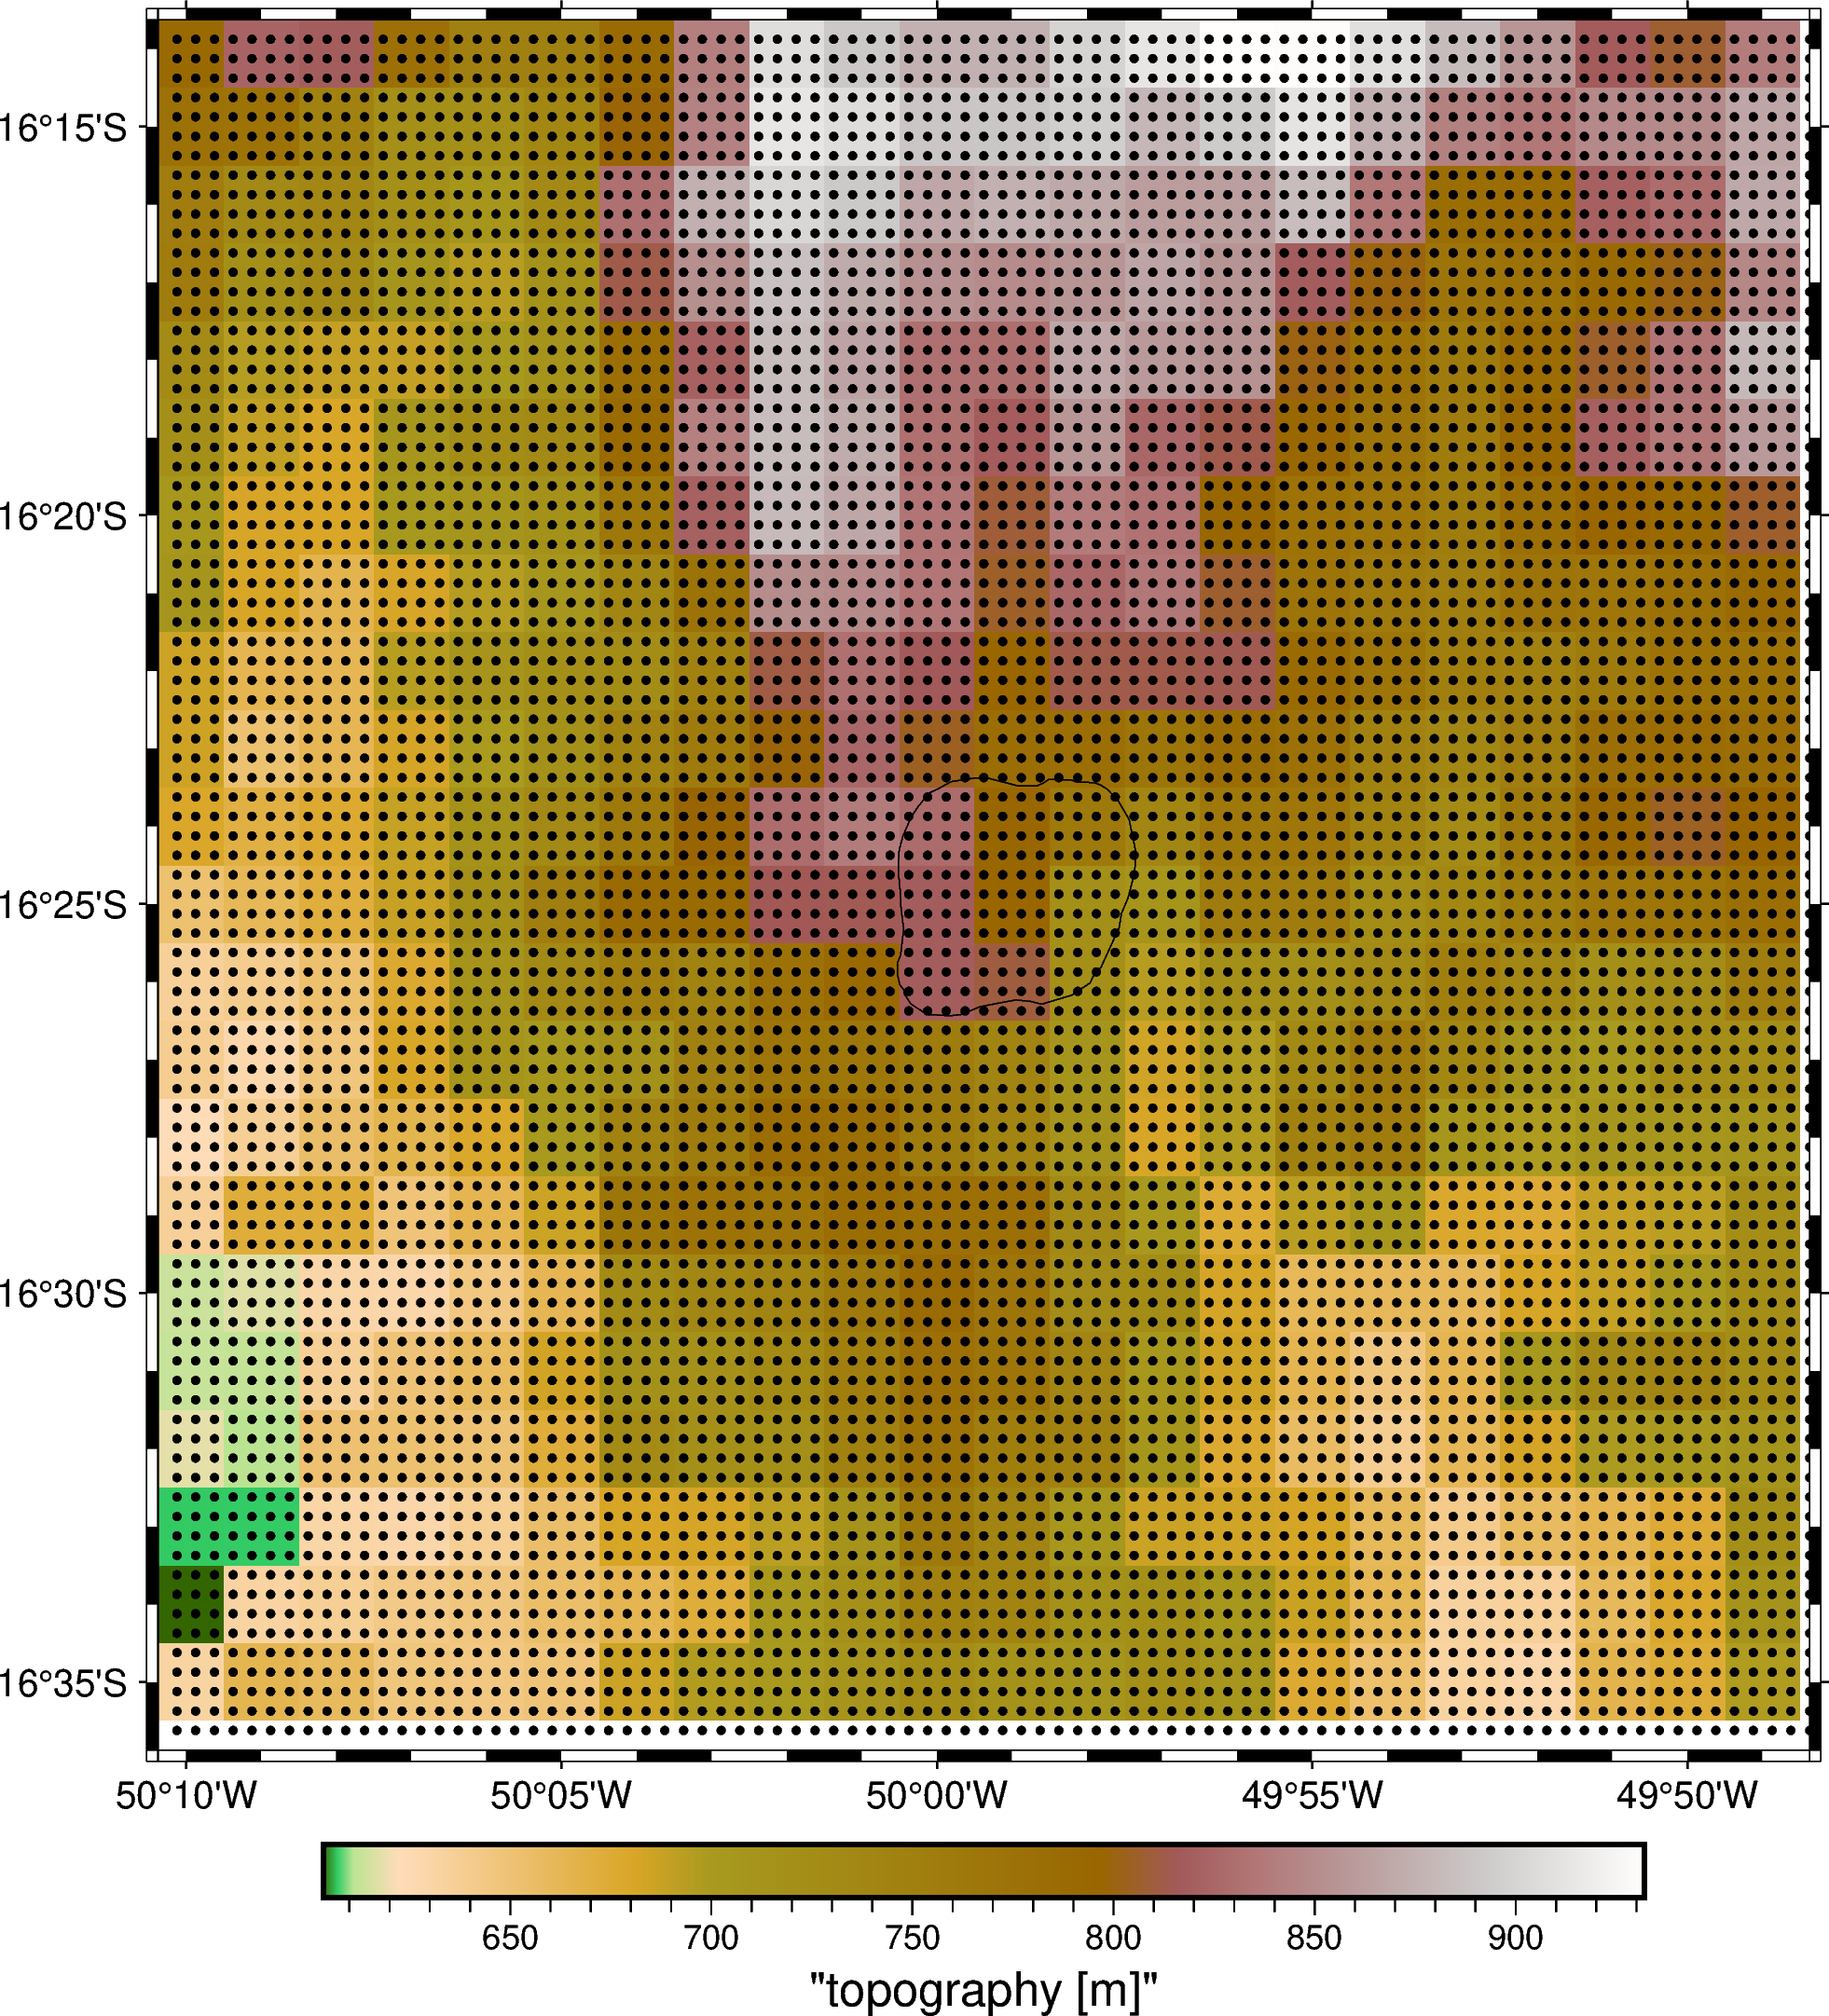

In [67]:
fig = pygmt.Figure()
fig.grdimage(topography, projection="M15c", cmap="etopo1", frame=True)
fig.colorbar(frame='af+l"topography [m]"')
fig.coast(shorelines="white", area_thresh=1e6)
fig.plot(
    x=data.Longitude,
    y=data.Latitude,
    style="c0.08c",
    fill="black",
)
fig.plot(data=pluton, projection='M')
fig.show(width=600)

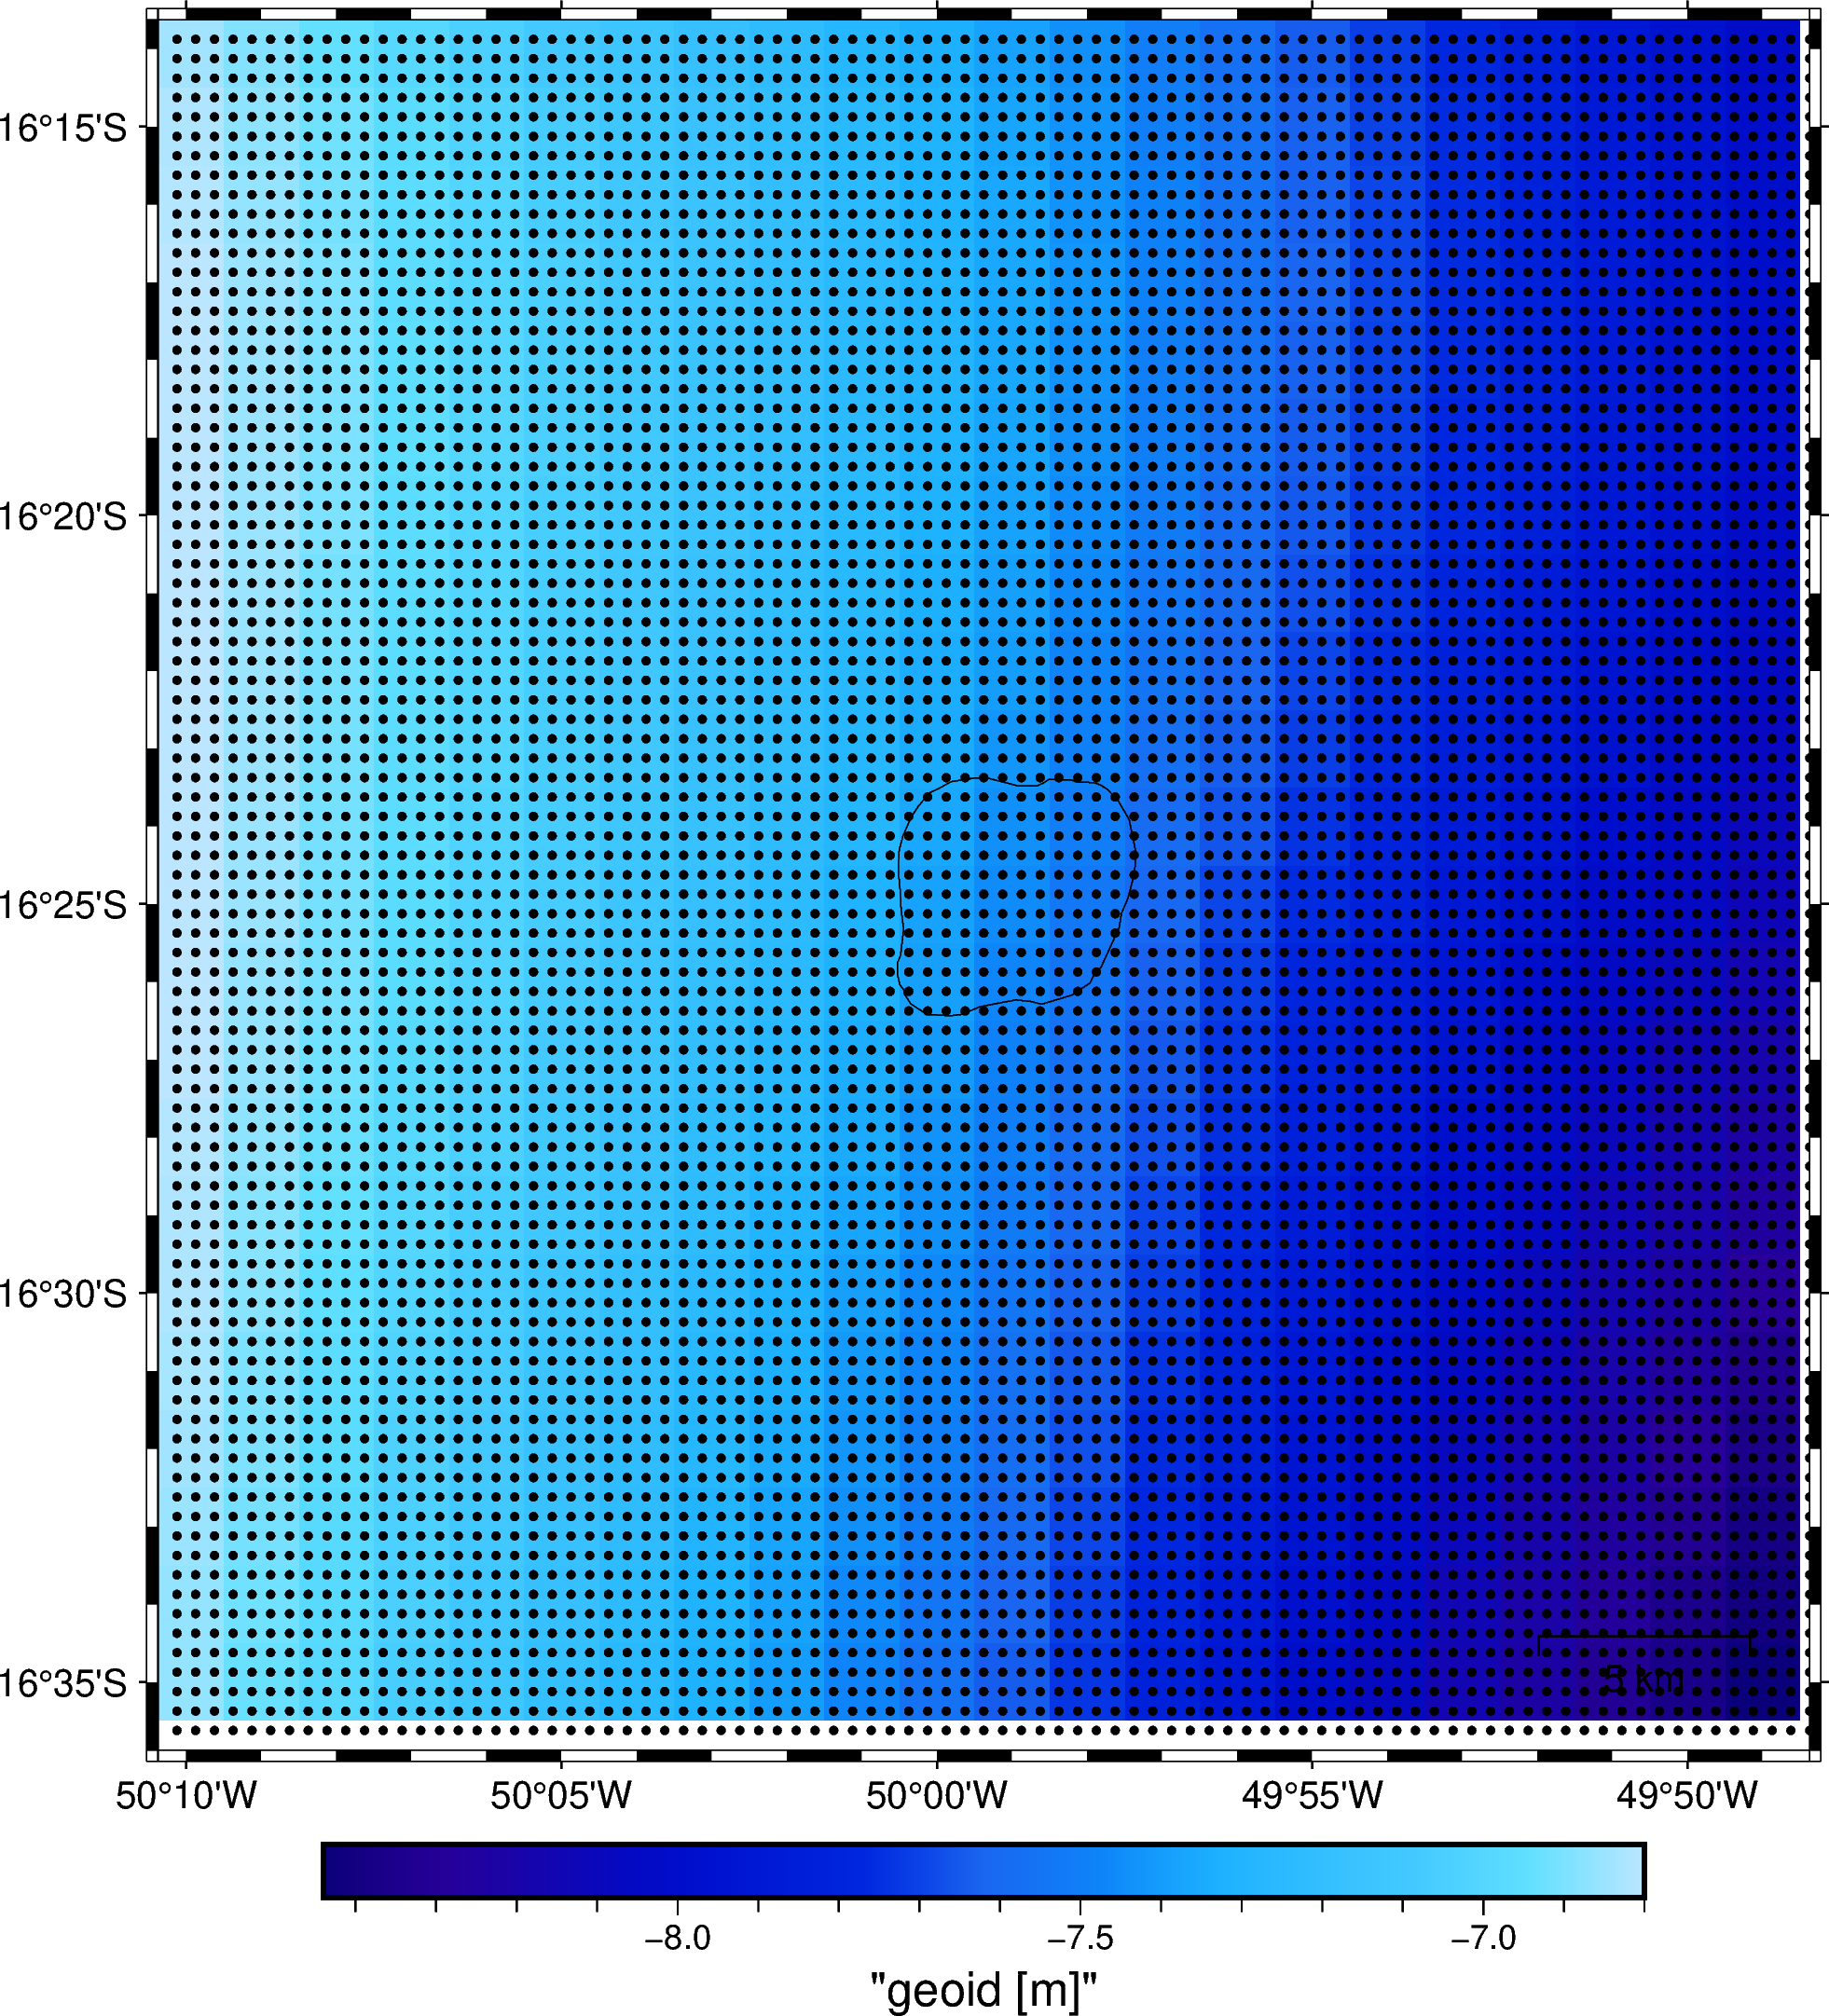

In [68]:
fig = pygmt.Figure()
fig.grdimage(geoid, projection="M15c", cmap="etopo1", frame=True)
fig.colorbar(frame='af+l"geoid [m]"')
fig.coast(shorelines="white", area_thresh=1e6)
fig.plot(
    x=data.Longitude,
    y=data.Latitude,
    style="c0.08c",
    fill="black",
)
fig.plot(data=pluton, projection='M')
fig.basemap(map_scale="n0.9/0.06+w5k+u")
fig.show(width=600)

## Converte altitudes ortométricas para geométricas

In [69]:
topography_geometric = topography + geoid
topography_geometric

<xarray.DataArray (latitude: 22, longitude: 22)> Size: 4kB
array([[624.64000034, 656.57000017, 652.01000023, 639.44000006,
        637.88000011, 640.80999994, 678.74000025, 689.18000031,
        693.60000038, 703.51999998, 717.94000006, 708.36000013,
        701.76999998, 714.18000031, 699.59000015, 668.        ,
        644.92000008, 624.34000015, 620.27000046, 657.19000053,
        666.13000011, 688.56000042],
       [596.64000034, 625.07999992, 630.01999998, 635.95000029,
        638.89000034, 646.82000017, 656.76000023, 665.69000006,
        694.12000036, 709.03999996, 739.46000004, 733.88000011,
        710.28999996, 712.20000029, 697.61000013, 679.03000021,
        654.44000053, 625.36000061, 626.78999996, 652.22000027,
        670.15000057, 705.59000015],
       [600.1500001 , 600.09000015, 623.01999998, 621.46000004,
        629.9000001 , 647.32999992, 673.76999998, 675.20000029,
        685.13000011, 706.55999994, 754.98000002, 734.4000001 ,
        698.80999994, 678.72000027, 676.14000034, 674.05000019,
        652.47000027, 632.89000034, 649.81000042, 655.73999977,
        666.68000031, 710.61000061],
       [611.16000032, 604.10000038, 644.53000021, 644.97000027,
        643.41000032, 665.84000015, 721.28000021, 711.72000027,
...
        792.30999994, 763.24000025, 767.18000031, 782.12000036,
        793.05999994, 838.5       ],
       [747.69000006, 726.14000034, 729.09000015, 714.03999996,
        700.99000025, 722.94000006, 823.89000034, 866.35000038,
        894.30000019, 884.75      , 860.69000006, 867.64000034,
        861.07000017, 854.01000023, 854.94000006, 875.37000036,
        828.30999994, 775.74000025, 778.18000031, 812.62000036,
        821.55999994, 860.5       ],
       [770.18000031, 766.13000011, 739.07999992, 713.53000021,
        714.48000002, 730.43000031, 790.88000011, 836.34000015,
        906.28999996, 899.24000025, 881.69000006, 882.13000011,
        888.57000017, 871.5       , 885.94000006, 904.37000036,
        866.30000019, 834.74000025, 828.17000008, 840.11000013,
        840.55000019, 859.48999977],
       [783.16000032, 816.61000013, 811.55999994, 771.51000023,
        742.46000004, 741.41000032, 779.87000036, 833.82000017,
        900.26999998, 883.22000027, 867.67000008, 867.12000036,
        892.05999994, 905.99000025, 924.43000031, 922.86000013,
        900.78999996, 874.72000027, 848.66000032, 809.60000038,
        799.53999996, 831.9800005 ]])
Coordinates:
  * latitude   (latitude) float64 176B -16.58 -16.57 -16.55 ... -16.25 -16.23
  * longitude  (longitude) float64 176B -50.17 -50.15 -50.13 ... -49.83 -49.82

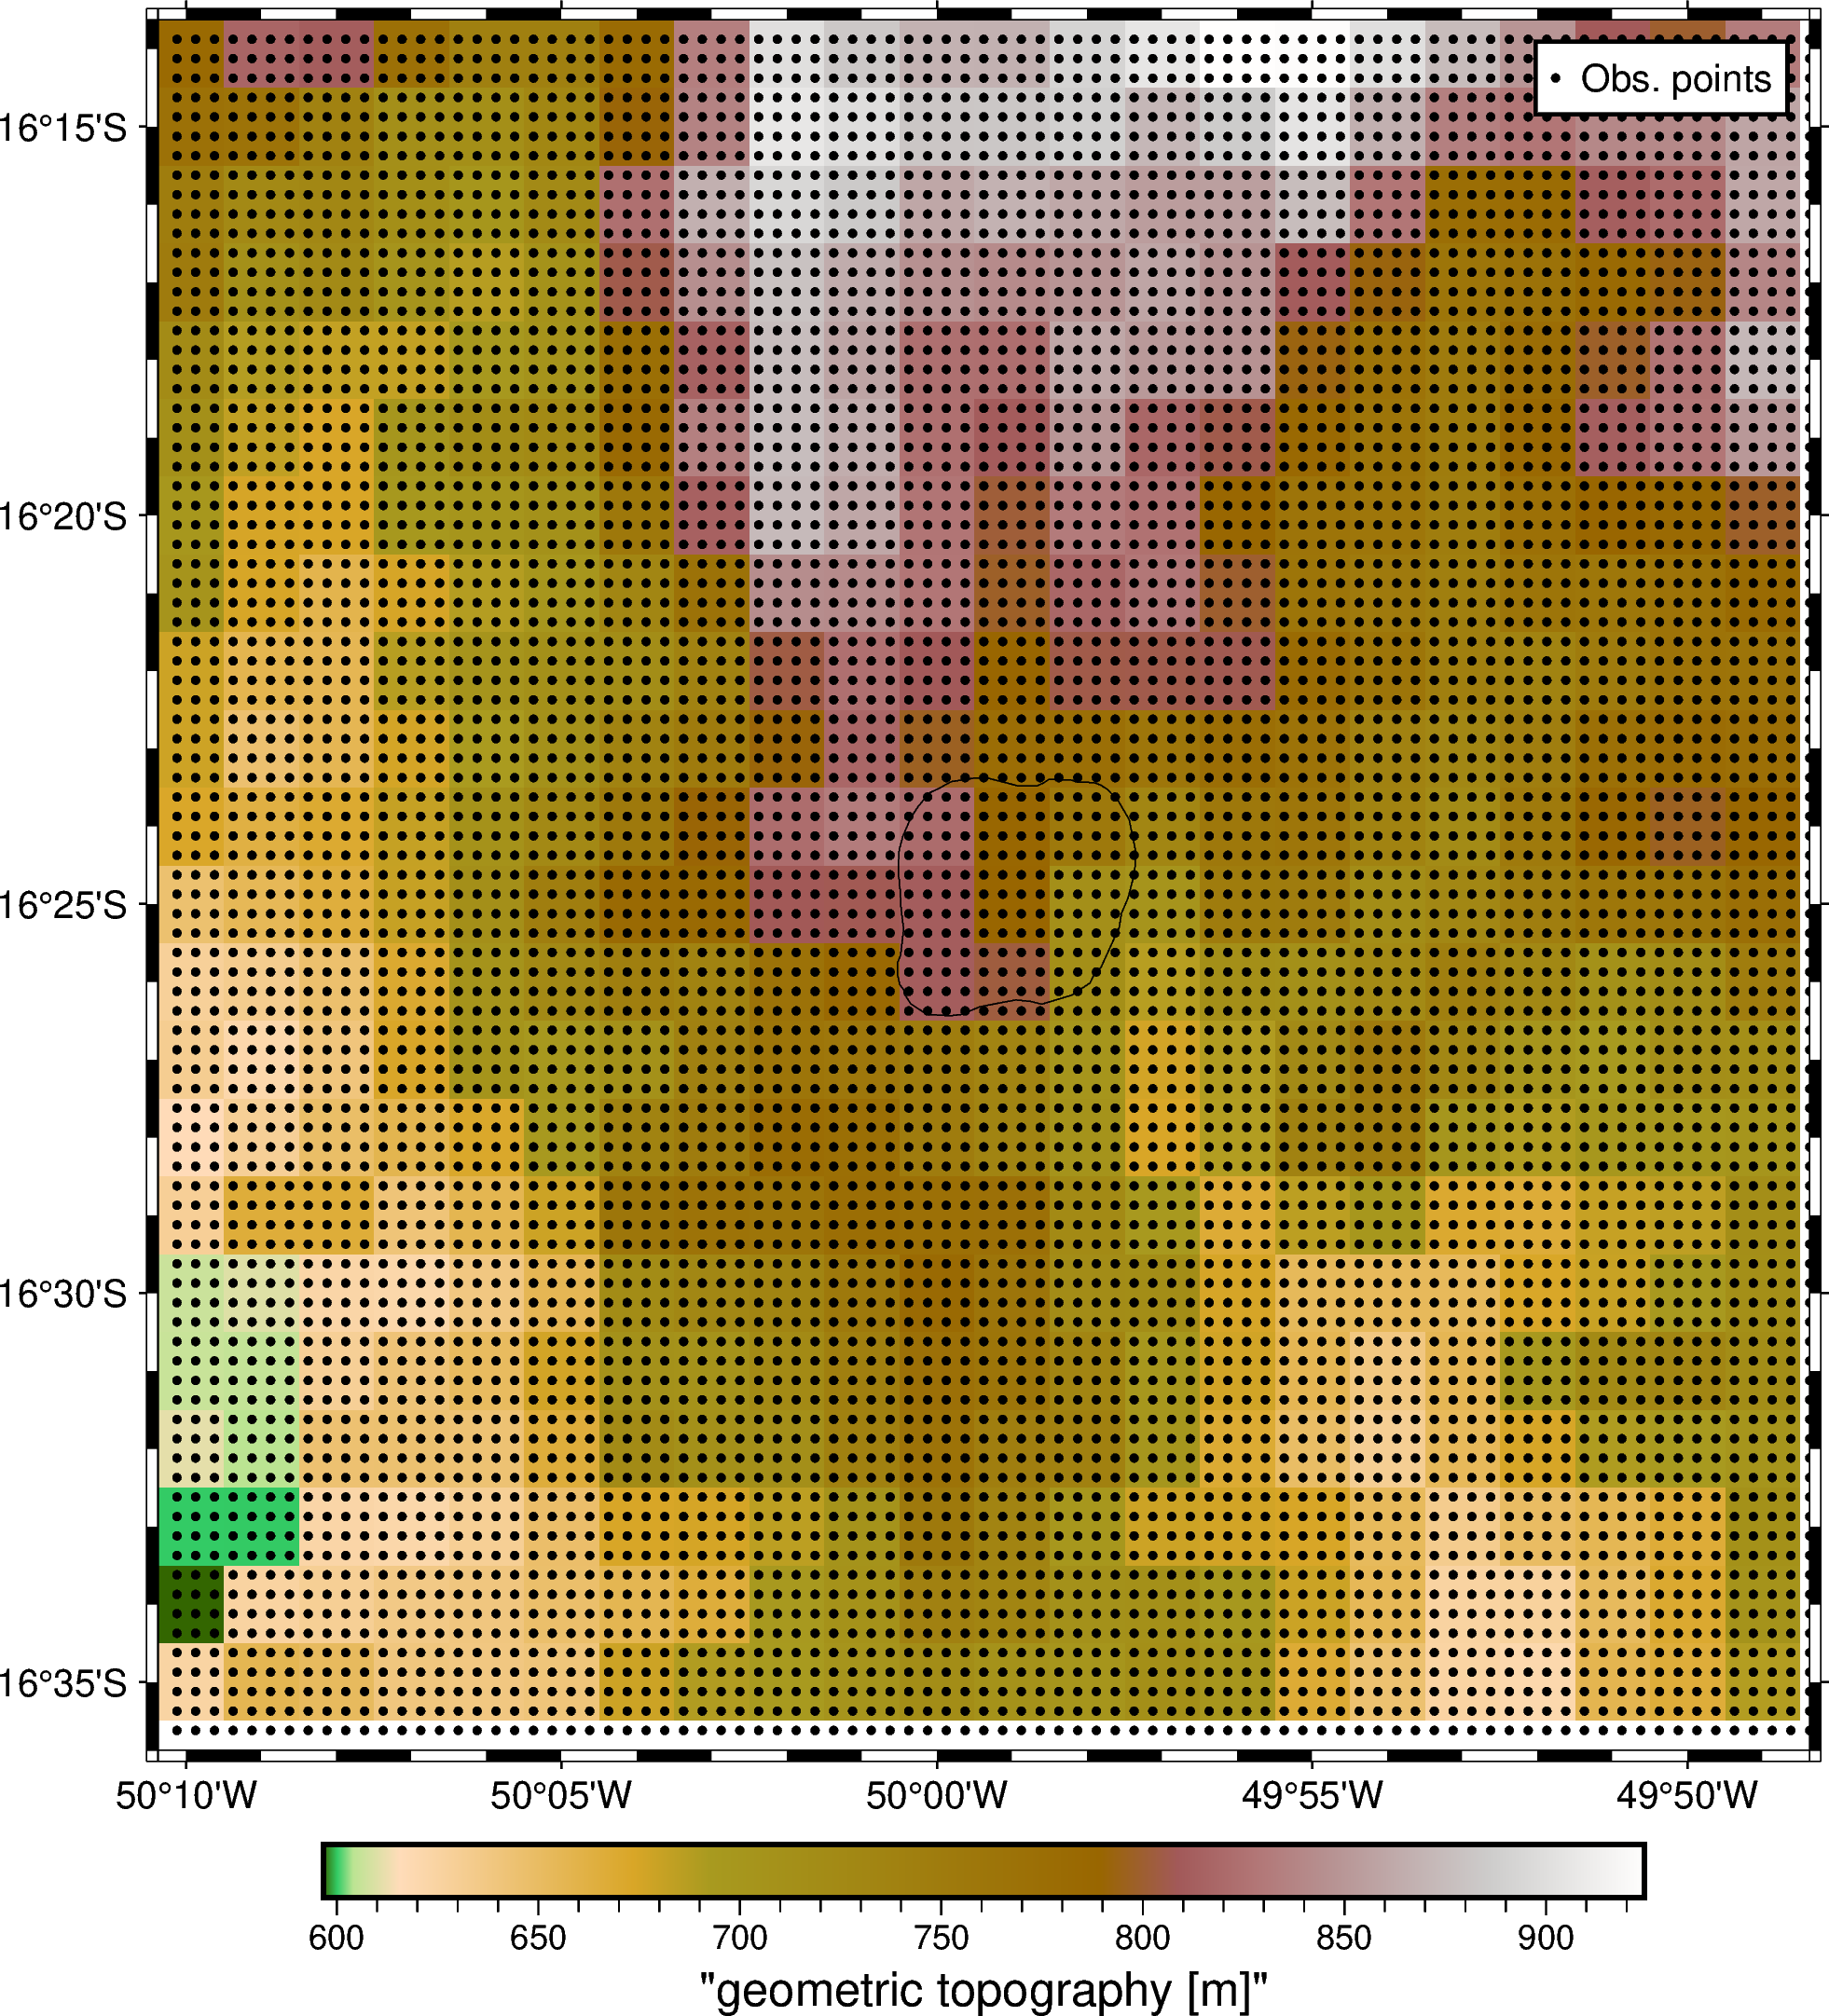

In [70]:
fig = pygmt.Figure()
fig.grdimage(topography_geometric, projection="M15c", cmap="etopo1", frame=True)
fig.colorbar(frame='af+l"geometric topography [m]"')
fig.coast(shorelines="white", area_thresh=1e6)
fig.plot(
    x=data.Longitude,
    y=data.Latitude,
    style="c0.08c",
    fill="black",
    label='Obs. points'
)
fig.legend()
fig.plot(data=pluton, projection='M')
fig.show(width=600)

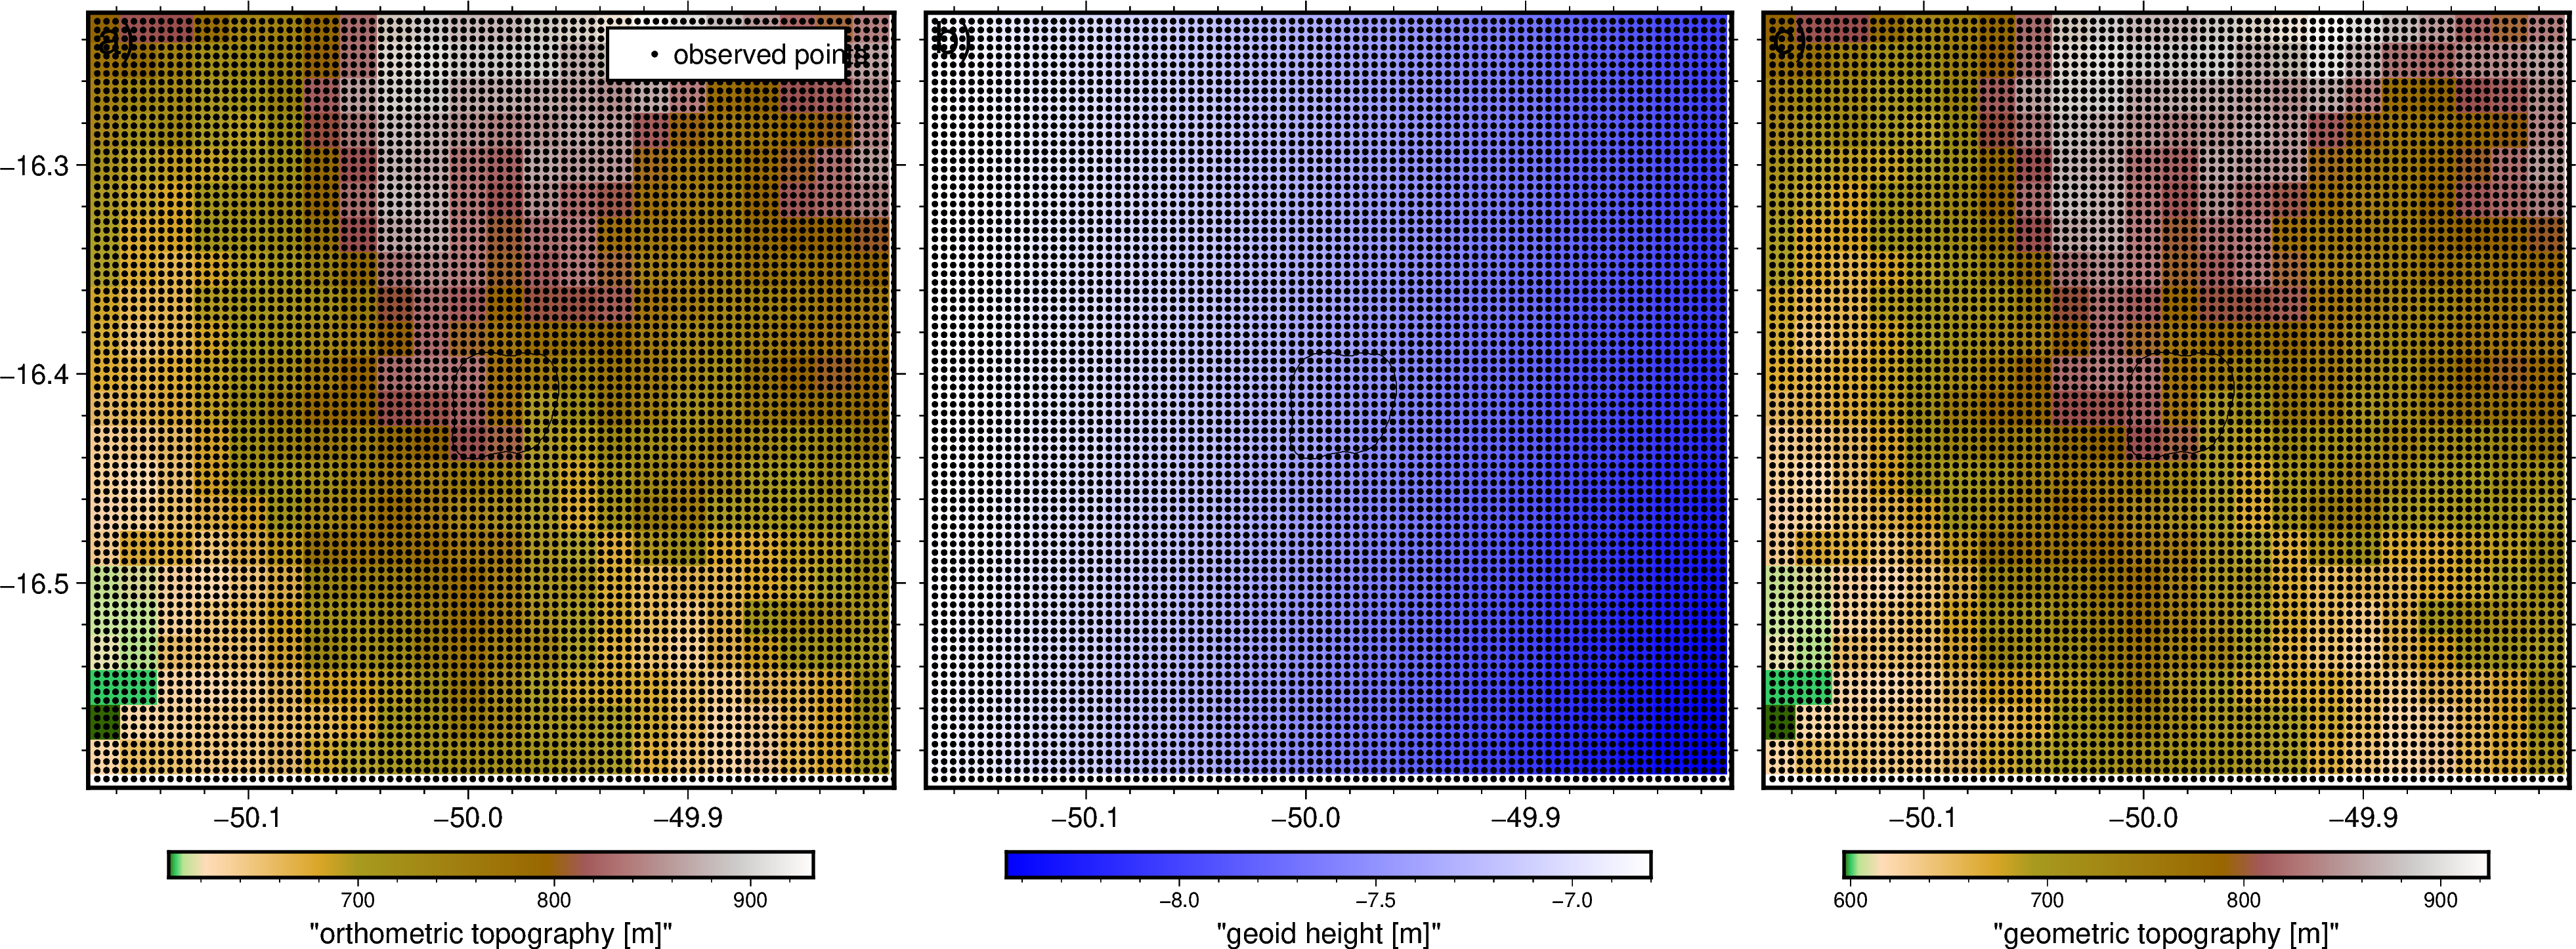

In [71]:
with plt.rc_context(mpl_rc):
    fig = pygmt.Figure()
    # pygmt.config(FORMAT_GEO_MAP="ddd.xx")
    with fig.subplot(
        nrows=1, ncols=3, figsize=("32c", "10c"), autolabel=True, margins="-0.05c"
    ):
        with fig.set_panel(panel=0):
            
            fig.grdimage(topography, projection="X", cmap="etopo1", frame=["WSne", "xaf", "yaf"],
                        shading="+a45+nt0.15")# frame=["WSne", "xafg+lx-axis", "yafg+ly-axis"])
            fig.colorbar(frame='af+l"orthometric topography [m]"')
            fig.plot(
                        x=data.Longitude,
                        y=data.Latitude,
                        style="c0.08c",
                        fill="black",
                        label='observed points'
                    )
            fig.plot(data=pluton, projection='M')
            fig.legend()
            # fig.basemap(map_scale="n0.9/0.06+w5k+u")
    
    
        with fig.set_panel(panel=1):
            fig.grdimage(geoid, projection="X", cmap="polar+h", frame=["WSne", "xaf", "f"])
            fig.colorbar(frame='af+l"geoid height [m]"')
            fig.plot(
                        x=data.Longitude,
                        y=data.Latitude,
                        style="c0.08c",
                        fill="black",
                    )
            fig.plot(data=pluton, projection='M')
            # fig.basemap(map_scale="n0.9/0.06+w5k+u")
        with fig.set_panel(panel=2):
            fig.grdimage(topography_geometric, projection="X", cmap="etopo1", frame=["WSne", "xaf", "f"],
                        shading="+a45+nt0.15")
            fig.colorbar(frame='af+l"geometric topography [m]"')
            fig.plot(
                        x=data.Longitude,
                        y=data.Latitude,
                        style="c0.08c",
                        fill="black",
                    )
            fig.plot(data=pluton, projection='M')

fig.savefig(image_dir / 'heights.png', dpi=300)
fig.show()


In [72]:
geoid_table = vd.grid_to_table(geoid)
interpolator = vd.KNeighbors()
interpolator.fit((geoid_table.longitude, geoid_table.latitude), geoid_table.scalars)
data = data.assign(geoid_m=interpolator.predict((data.Longitude, data.Latitude)))
data = data.assign(height_geometric_m=data.Elevation + data.geoid_m)
# data
# geoid_table

## Distúrbio da gravidade

In [85]:
data.head()

Station  Longitude   Latitude  Elevation        Gravity  geoid_m  \
0        2 -50.172917 -16.597917      594.0  978288.210050    -6.86   
1        3 -50.168750 -16.597917      595.0  978287.413200    -6.86   
2        4 -50.164583 -16.597917      603.0  978284.467233    -6.86   
3        5 -50.160417 -16.597917      616.0  978279.995975    -6.86   
4        6 -50.156250 -16.597917      626.0  978276.475002    -6.93   

   height_geometric_m  normal_gravity_mgal  gravity_disturbance_mgal  \
0              587.14        978272.730618                 15.479431   
1              588.14        978272.421960                 14.991240   
2              596.14        978269.952696                 14.514537   
3              609.14        978265.940163                 14.055812   
4              619.07        978262.875221                 13.599781   

       easting_m    northing_m  gravity_bouguer_mgal  
0  588225.577159  8.164743e+06             14.697839  
1  588670.065069  8.164741e+06             14.110907  
2  589114.553375  8.164739e+06             13.497865  
3  589559.041011  8.164737e+06             12.867773  
4  590003.530113  8.164735e+06             12.240599

In [86]:
# interpolator = vd.KNeighbors()
# interpolator.fit((data.Longitude, data.Latitude), data.Gravity)
# data = data.assign(Gravity=interpolator.predict((data.Longitude, data.Latitude)))
# data = data.assign(height_geometric_m=data.Elevation + data.geoid_m)

In [73]:
data = data.assign(
    normal_gravity_mgal=bl.WGS84.normal_gravity(data.Latitude, data.height_geometric_m)
)
data = data.assign(gravity_disturbance_mgal=data.Gravity - data.normal_gravity_mgal)
data.head()

Station  Longitude   Latitude  Elevation        Gravity  geoid_m  \
0        2 -50.172917 -16.597917      594.0  978288.210050    -6.86   
1        3 -50.168750 -16.597917      595.0  978287.413200    -6.86   
2        4 -50.164583 -16.597917      603.0  978284.467233    -6.86   
3        5 -50.160417 -16.597917      616.0  978279.995975    -6.86   
4        6 -50.156250 -16.597917      626.0  978276.475002    -6.93   

   height_geometric_m  normal_gravity_mgal  gravity_disturbance_mgal  
0              587.14        978272.730618                 15.479431  
1              588.14        978272.421960                 14.991240  
2              596.14        978269.952696                 14.514537  
3              609.14        978265.940163                 14.055812  
4              619.07        978262.875221                 13.599781

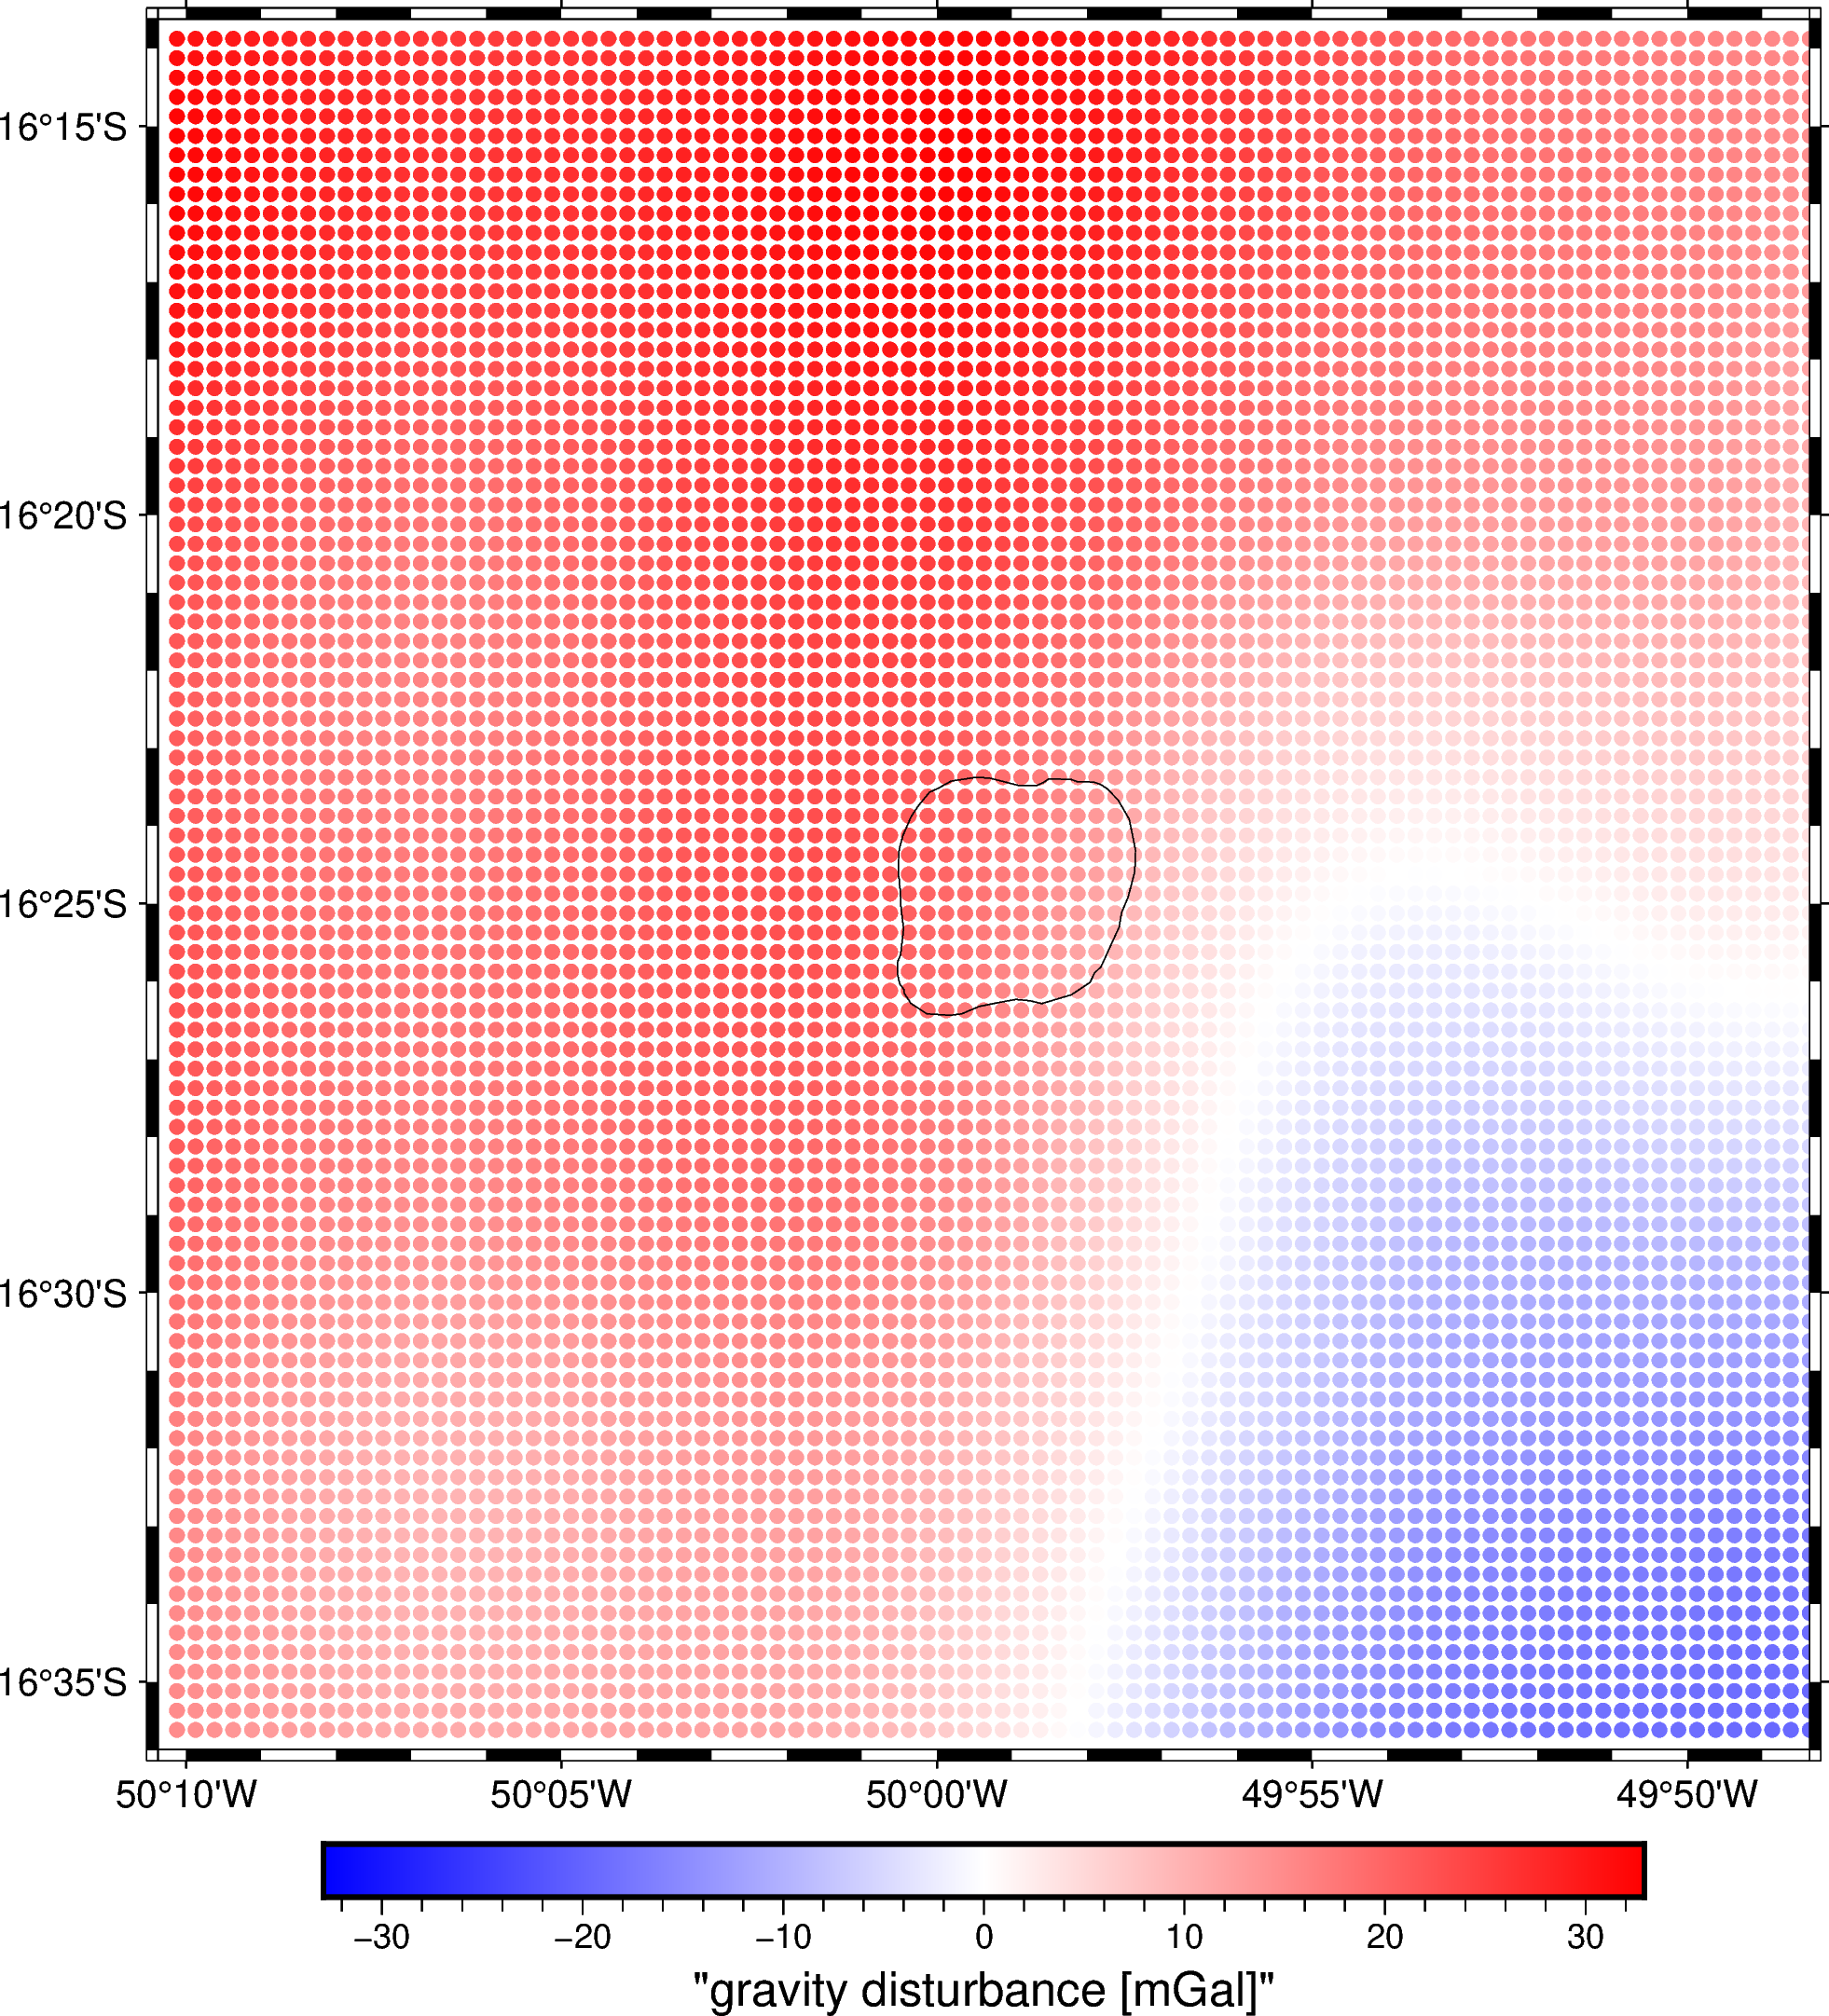

In [74]:
fig = pygmt.Figure()
maxabs = vd.maxabs(data.gravity_disturbance_mgal)
pygmt.makecpt(cmap="polar+h", series=[-maxabs, maxabs])
fig.plot(
    x=data.Longitude,
    y=data.Latitude,
    fill=data.gravity_disturbance_mgal,
    cmap=True,
    style="c4p",
    projection="M15c",
    frame="af",
)
fig.plot(data=pluton, projection='M')
fig.colorbar(frame='af+l"gravity disturbance [mGal]"')
fig.show(width=600)

image

<!-- ## Correção topográfica -->

<!-- ![](https://www.fatiando.org/tutorials/_images/topographic-correction.svg) -->

In [75]:
# projection = pyproj.Proj(proj="merc", lat_ts=data.latitude.mean())
projection = pyproj.Proj(proj='utm', ellps='WGS84', zone=22, south=True)

In [76]:
easting, northing = projection(data.Longitude.values, data.Latitude.values)
data = data.assign(easting_m=easting, northing_m=northing)
data.head(5)

Station  Longitude   Latitude  Elevation        Gravity  geoid_m  \
0        2 -50.172917 -16.597917      594.0  978288.210050    -6.86   
1        3 -50.168750 -16.597917      595.0  978287.413200    -6.86   
2        4 -50.164583 -16.597917      603.0  978284.467233    -6.86   
3        5 -50.160417 -16.597917      616.0  978279.995975    -6.86   
4        6 -50.156250 -16.597917      626.0  978276.475002    -6.93   

   height_geometric_m  normal_gravity_mgal  gravity_disturbance_mgal  \
0              587.14        978272.730618                 15.479431   
1              588.14        978272.421960                 14.991240   
2              596.14        978269.952696                 14.514537   
3              609.14        978265.940163                 14.055812   
4              619.07        978262.875221                 13.599781   

       easting_m    northing_m  
0  588225.577159  8.164743e+06  
1  588670.065069  8.164741e+06  
2  589114.553375  8.164739e+06  
3  589559.041011  8.164737e+06  
4  590003.530113  8.164735e+06

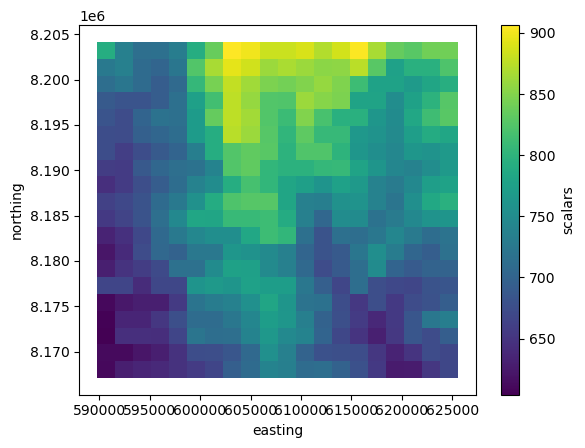

In [77]:
topography_proj = vd.project_grid(topography_geometric, projection, method="nearest")
topography_proj.plot()

In [78]:
# PASSA BAIXA DO FATAINDO

In [79]:
topography_density = np.where(topography_proj > 0, 2670, 1040 - 2670)
topography_model = hm.prism_layer(
    coordinates=(topography_proj.easting, topography_proj.northing),
    surface=topography_proj,
    reference=0,
    properties={"density": topography_density}
)
# topography_model.density.plot()

In [80]:
coordinates = (data.easting_m, data.northing_m, data.height_geometric_m)
terrain_effect = topography_model.prism_layer.gravity(coordinates, field="g_z")

In [81]:
data = data.assign(
    gravity_bouguer_mgal=data.gravity_disturbance_mgal - terrain_effect
)
data.head()

Station  Longitude   Latitude  Elevation        Gravity  geoid_m  \
0        2 -50.172917 -16.597917      594.0  978288.210050    -6.86   
1        3 -50.168750 -16.597917      595.0  978287.413200    -6.86   
2        4 -50.164583 -16.597917      603.0  978284.467233    -6.86   
3        5 -50.160417 -16.597917      616.0  978279.995975    -6.86   
4        6 -50.156250 -16.597917      626.0  978276.475002    -6.93   

   height_geometric_m  normal_gravity_mgal  gravity_disturbance_mgal  \
0              587.14        978272.730618                 15.479431   
1              588.14        978272.421960                 14.991240   
2              596.14        978269.952696                 14.514537   
3              609.14        978265.940163                 14.055812   
4              619.07        978262.875221                 13.599781   

       easting_m    northing_m  gravity_bouguer_mgal  
0  588225.577159  8.164743e+06             14.697839  
1  588670.065069  8.164741e+06             14.110907  
2  589114.553375  8.164739e+06             13.497865  
3  589559.041011  8.164737e+06             12.867773  
4  590003.530113  8.164735e+06             12.240599

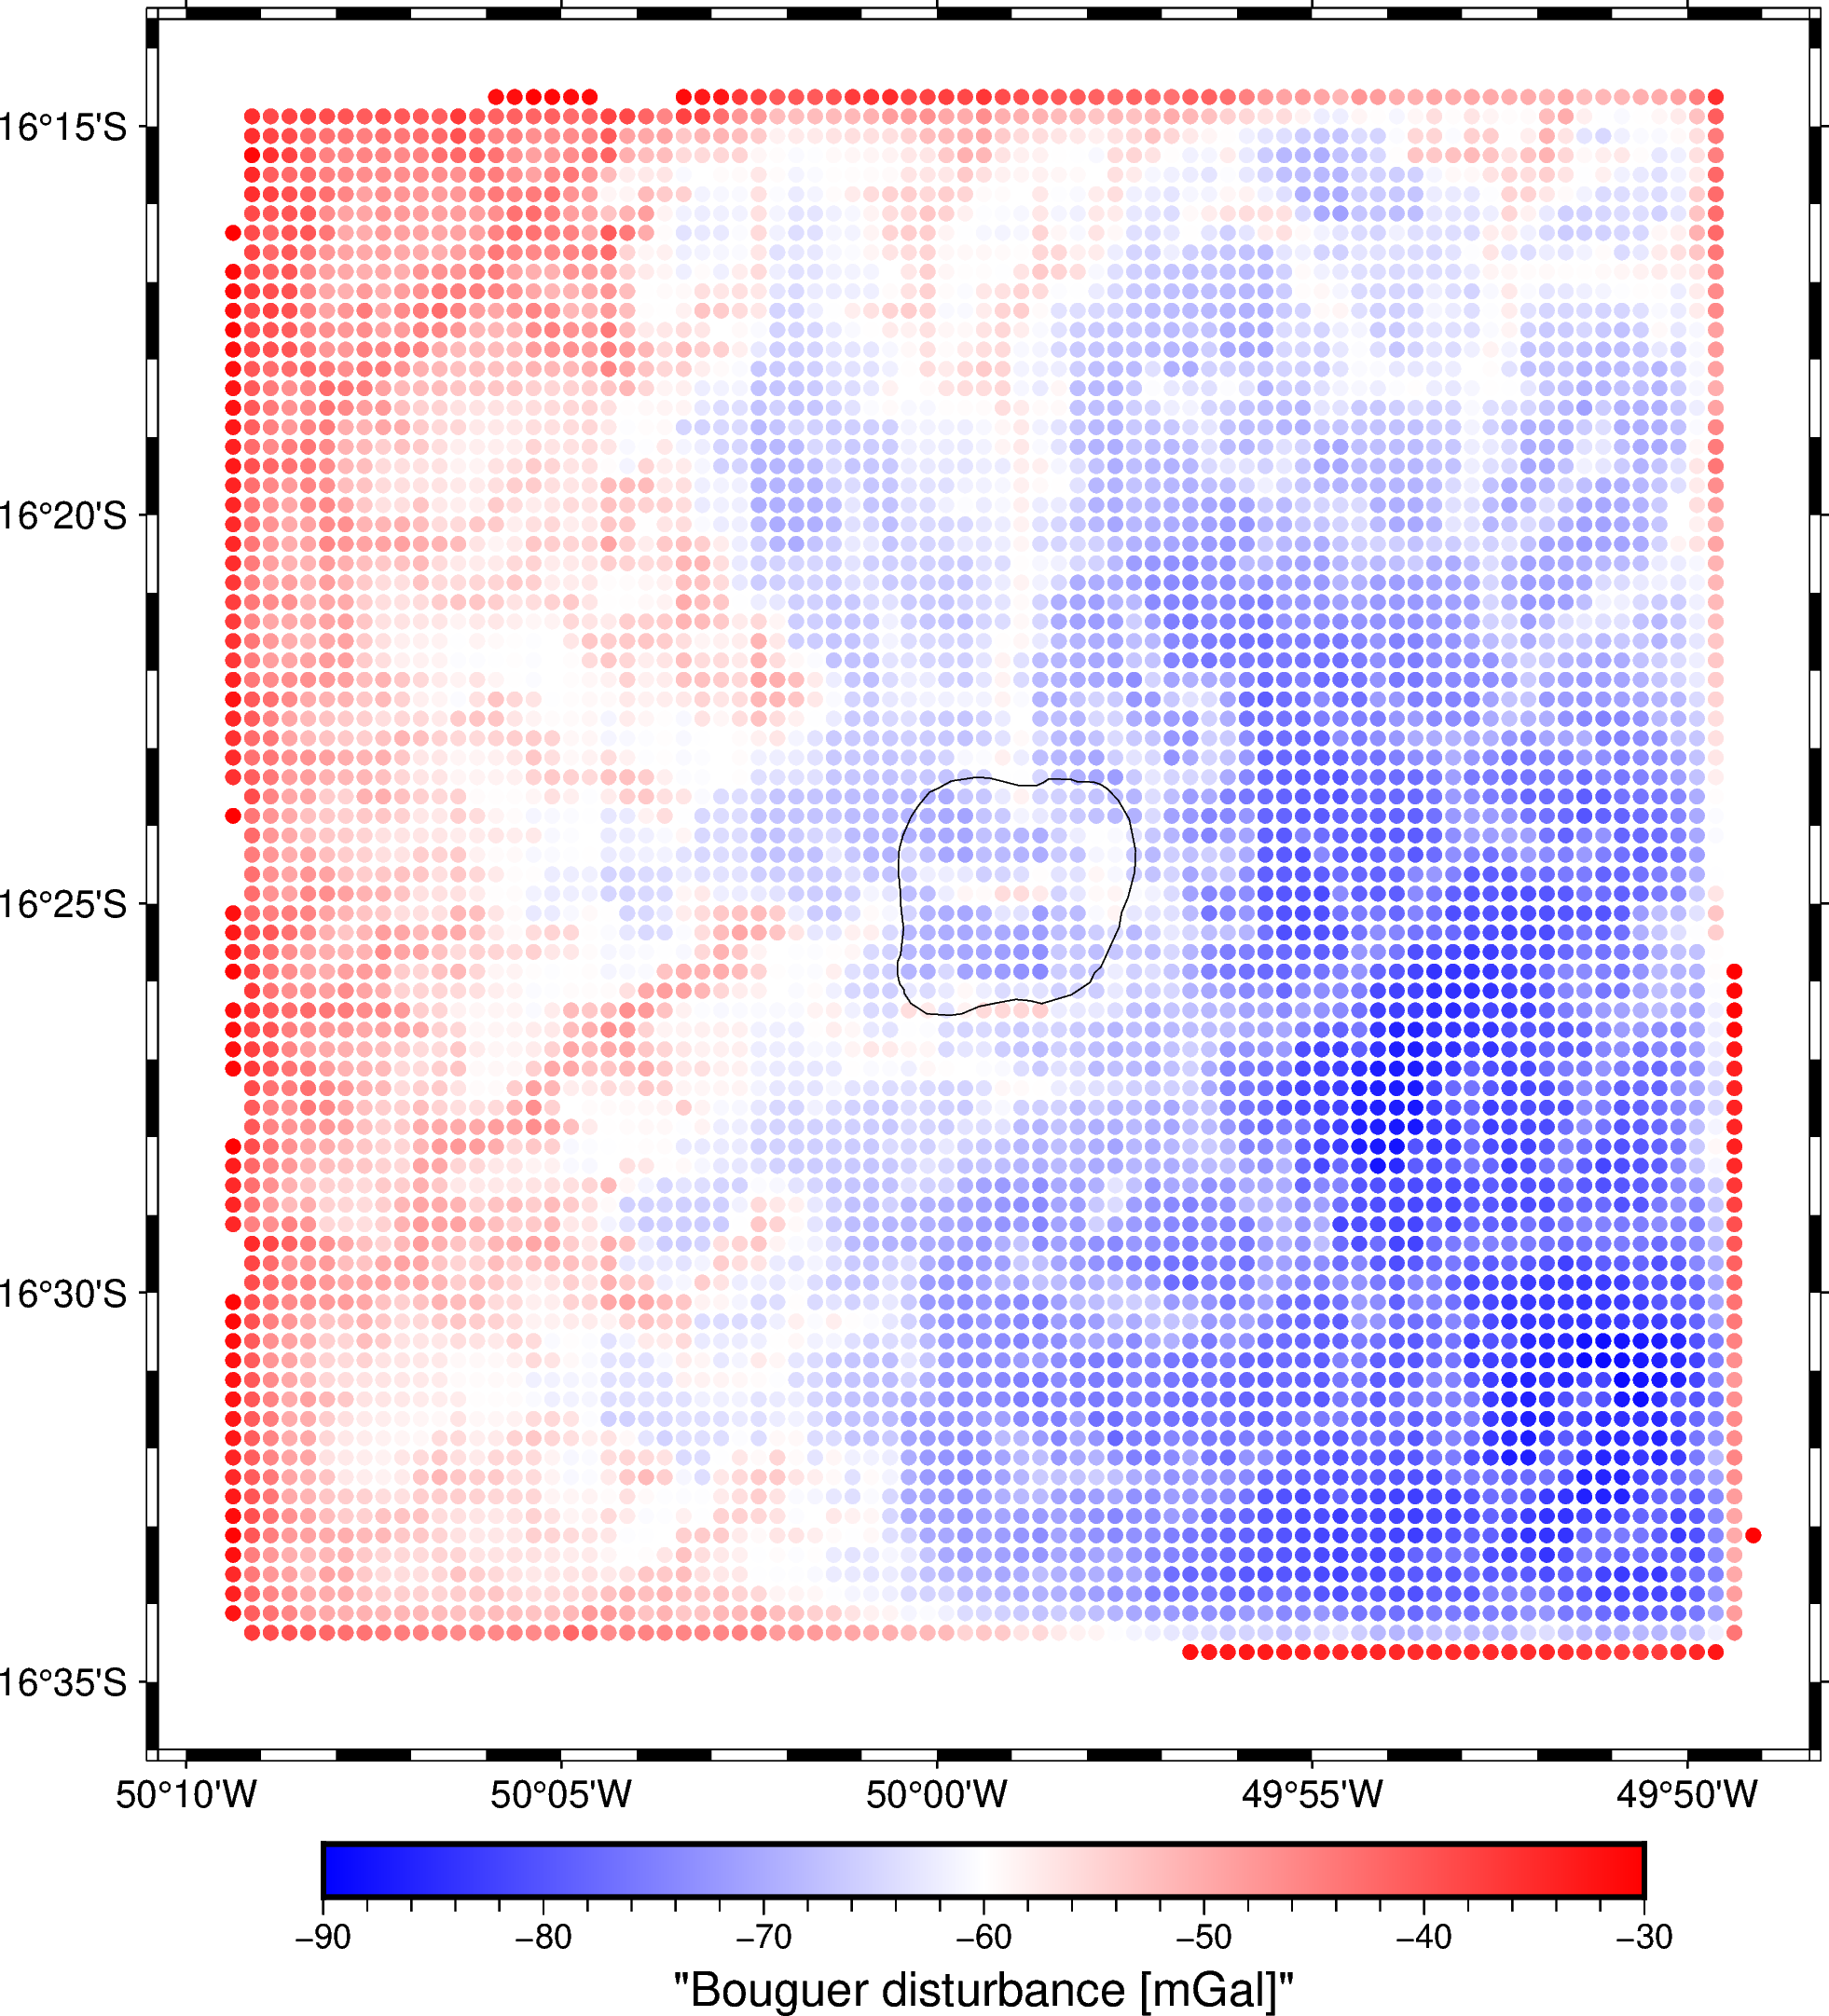

In [82]:
fig = pygmt.Figure()
maxabs = vd.maxabs(data.gravity_bouguer_mgal)
pygmt.makecpt(cmap="polar", series=[-90, -30])
fig.plot(
    x=data.Longitude,
    y=data.Latitude,
    fill=data.gravity_bouguer_mgal,
    cmap=True,
    style="c4p",
    projection="M15c",
    frame=True,
)
fig.colorbar(frame='af+l"Bouguer disturbance [mGal]"')
fig.plot(data=pluton, projection='M')
fig.show()

In [83]:
eqs = hm.EquivalentSources(damping=1.0, depth=30e3)
eqs.fit((data.easting_m, data.northing_m, data.height_geometric_m),  data.gravity_bouguer_mgal) # data.gravity_bouguer_mgal)

EquivalentSources(damping=1.0, depth=30000.0)

In [84]:
# Interpolar extra coord a partir da topografia
region_pad_2 = vd.pad_region(region, pad=-0.05)
grid_extra_coord = vd.grid_coordinates(region_pad_2, spacing= 2 / 3600)

interpolator = vd.KNeighbors()
topography_table = vd.grid_to_table(topography)
interpolator.fit((topography_table.longitude, topography_table.latitude), topography_table.z)
extra_coord=interpolator.predict((grid_extra_coord[0], grid_extra_coord[1]))

# geoid_values = np.reshape(geoid_1.elevation, topography.shape)
coordinates_grid = ([grid_extra_coord[0], grid_extra_coord[1], extra_coord])

In [54]:
regional_grid = eqs.grid(
    # coordinates=vd.grid_coordinates(region_pad_2, spacing=2 / 3600, extra_coords=1.0e3),
    coordinates=coordinates_grid,
    data_names="gravity_regional",
    dims=("latitude", "longitude"),
    projection=projection,
)
regional_grid

<xarray.Dataset> Size: 4MB
Dimensions:           (latitude: 496, longitude: 481)
Coordinates:
  * longitude         (longitude) float64 4kB -50.12 -50.12 ... -49.86 -49.86
  * latitude          (latitude) float64 4kB -16.55 -16.55 ... -16.27 -16.27
    upward            (latitude, longitude) float64 2MB 614.0 614.0 ... 833.0
Data variables:
    gravity_regional  (latitude, longitude) float64 2MB -54.68 -54.83 ... -65.72
Attributes:
    metadata:  Generated by EquivalentSources(damping=1.0, depth=30000.0)

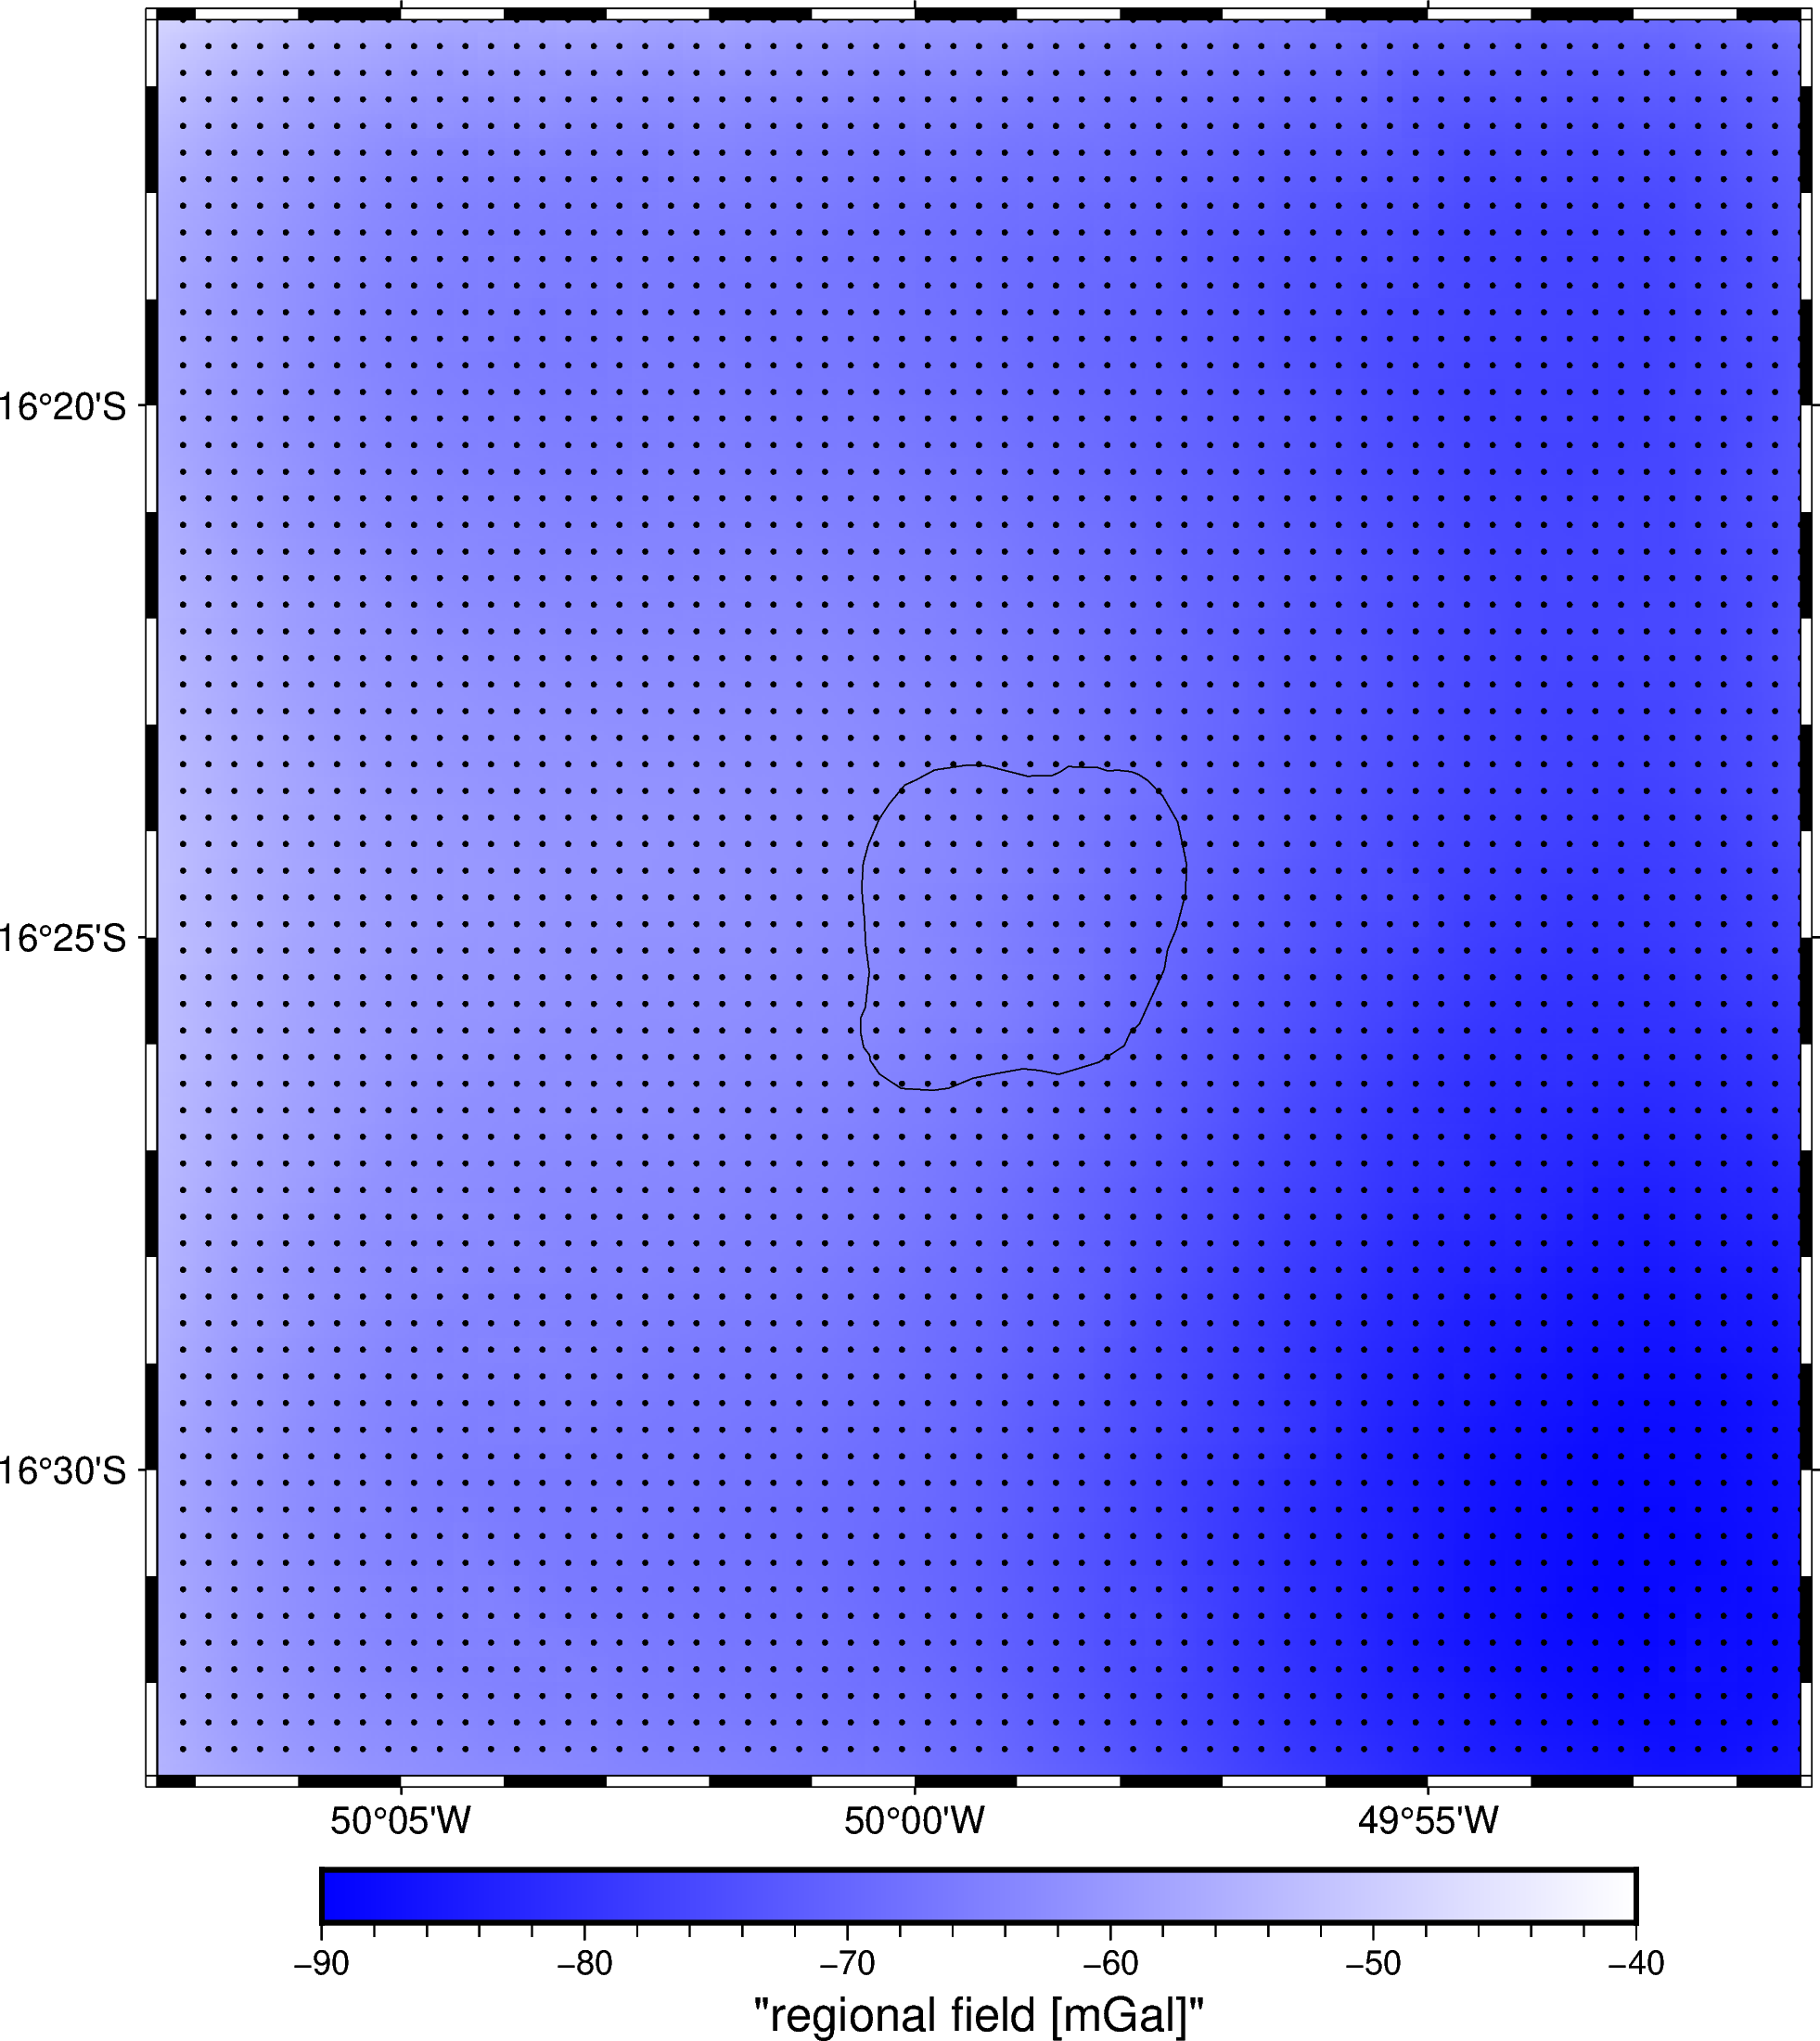

In [55]:
fig = pygmt.Figure()
pygmt.makecpt(cmap="polar+h", series=[-90, -40], no_bg=True)
# pygmt.makecpt(cmap="polar+h", series=[-85, -40], no_bg=True)
fig.grdimage(
    regional_grid.gravity_regional,
    # shading="+a45+nt0.15",
    projection="M15c",
    frame=True,
    region=vd.pad_region(region, pad=-0.05)
)
fig.colorbar(frame='af+l"regional field [mGal]"')
fig.plot(
    x=data.Longitude,
    y=data.Latitude,
    style="c0.05c",
    fill="black",
)
fig.plot(data=pluton, projection='M')
 
fig.show()

In [56]:
# Validação cruzada entre dados de grav residual e camada equivalente
r2_score = np.mean(
    vd.cross_val_score(
        eqs,
        coordinates,
        data.gravity_bouguer_mgal,
    )
)
print(f'O R² do modelo de camada equivalente para os dados é de: {r2_score:.3f}')

O R² do modelo de camada equivalente para os dados é de: 0.696


In [47]:
# Dados Locais
valores_a_remover = ['csg5_001', 'csg5_003', 'csg2_005', 'csg9_001']
df_local = pd.read_csv(data_dir/'CSG.csv', delimiter=',')
colunas_especificas = ['Latitude', 'Longitude', 'Gravity', 'Elevation', 'Station']
df_local = df_local[colunas_especificas]
df_local = df_local[~df_local['Station'].isin(valores_a_remover)]
df_local.head(10)

Latitude  Longitude        Gravity  Elevation    Station
0 -16.386936 -49.962121  978224.514612    749.009  csg10_001
1 -16.386212 -49.967838  978217.706954    796.077  csg10_002
2 -16.382504 -49.963106  978220.923469    764.537  csg10_003
3 -16.431268 -49.966788  978230.218997    734.446  csg10_005
4 -16.430324 -49.964049  978236.632548    694.596  csg10_006
5 -16.432018 -49.959065  978239.055513    672.365  csg10_007
6 -16.439817 -49.956038  978230.584075    703.841  csg10_008
7 -16.446370 -49.965245  978228.828473    721.347  csg10_009
8 -16.424009 -49.996369  978219.024025    882.687   csg2_001
9 -16.425004 -49.994198  978215.202400    892.382   csg2_002

## Interpolate the Bouguer disturbance into the local data file

In [48]:
regional_grid_table = vd.grid_to_table(regional_grid)
regional_grid_table.head(10)

latitude  longitude  upward  gravity_regional
0 -16.547917 -50.122917   614.0        -54.439860
1 -16.547917 -50.122361   614.0        -54.592542
2 -16.547917 -50.121806   614.0        -54.743735
3 -16.547917 -50.121250   614.0        -54.893442
4 -16.547917 -50.120694   613.0        -55.049466
5 -16.547917 -50.120139   613.0        -55.196219
6 -16.547917 -50.119583   613.0        -55.341502
7 -16.547917 -50.119028   613.0        -55.485319
8 -16.547917 -50.118472   613.0        -55.627675
9 -16.547917 -50.117917   613.0        -55.768577

In [49]:
interpolator = vd.KNeighbors()
interpolator.fit((regional_grid_table.longitude, regional_grid_table.latitude), regional_grid_table.gravity_regional)
df_local = df_local.assign(regional_bouguer=interpolator.predict((df_local.Longitude, df_local.Latitude)))
df_local.head(10)

Latitude  Longitude        Gravity  Elevation    Station  regional_bouguer
0 -16.386936 -49.962121  978224.514612    749.009  csg10_001        -68.102870
1 -16.386212 -49.967838  978217.706954    796.077  csg10_002        -67.182073
2 -16.382504 -49.963106  978220.923469    764.537  csg10_003        -68.216158
3 -16.431268 -49.966788  978230.218997    734.446  csg10_005        -67.888603
4 -16.430324 -49.964049  978236.632548    694.596  csg10_006        -68.396385
5 -16.432018 -49.959065  978239.055513    672.365  csg10_007        -69.456061
6 -16.439817 -49.956038  978230.584075    703.841  csg10_008        -70.532435
7 -16.446370 -49.965245  978228.828473    721.347  csg10_009        -69.642473
8 -16.424009 -49.996369  978219.024025    882.687   csg2_001        -63.366693
9 -16.425004 -49.994198  978215.202400    892.382   csg2_002        -63.571927

## Save it into a new csv file

In [50]:
df_local.to_csv(data_dir/'CSG_with_regional_from_satellite.csv', sep=',', index=False)

In [51]:
df_local.shape

(56, 6)